# Instructions

Below, you see different plots representing the relationship between different variables and Frequency. 

Per variable, please choose one plot which best represents the relationship between the variable and Frequency. On Thursday, we will then adjust the lines to best represent the relationship between each variable and Frequency.

Explanation of the plot:

X: The x variable

Y: Frequency

Line: Gives you the "predicted" frequency for each variable value. 

WARNING: The y-axis scale changes slightly in each plot since I did not want to preset it. For some models though, it changes extremely, check it before you choose for a model.

The variables are:
- AreaGLM: Density rating of the area car driver lives in, in continuous format (1: loe density area, 6: high density area (/Paris))
- Density: Density rating, number of inhabitants per km^2, in continous value format
- BonusMalus: Bonus / Malus rating, low means bonus, high means malus, in continous value format, 2 versions: BonusMalus as continuous variable, BonusMalusGLM capped for values > 150 (for very bad drivers)
- VehPower:  Car power, as categorical variable (low: low power, high: high power)
- VehAge: Car age in years, in continuous value format
- DrivAge: Driver's age in years, in continuous value format

Variable: AreaGLM

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


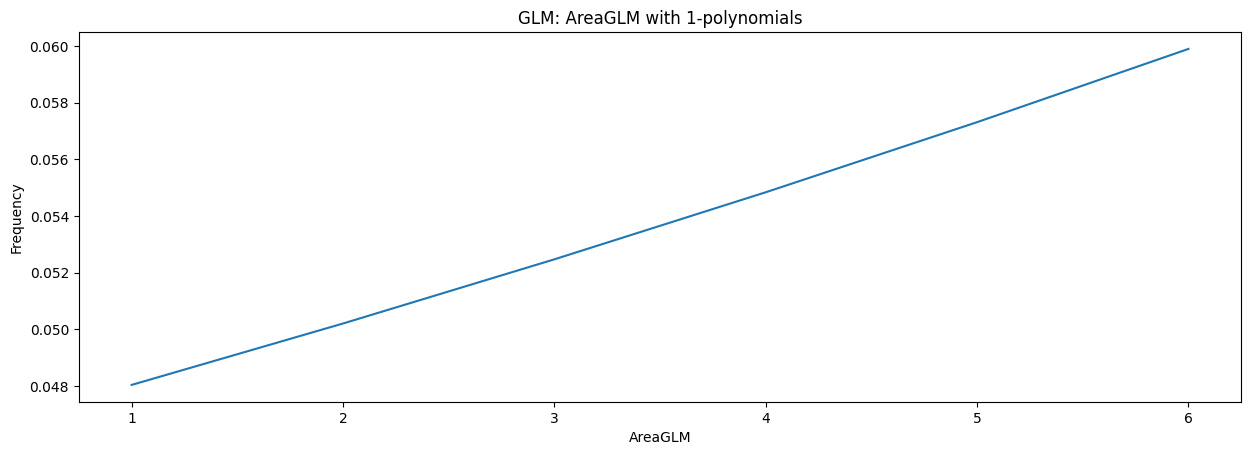

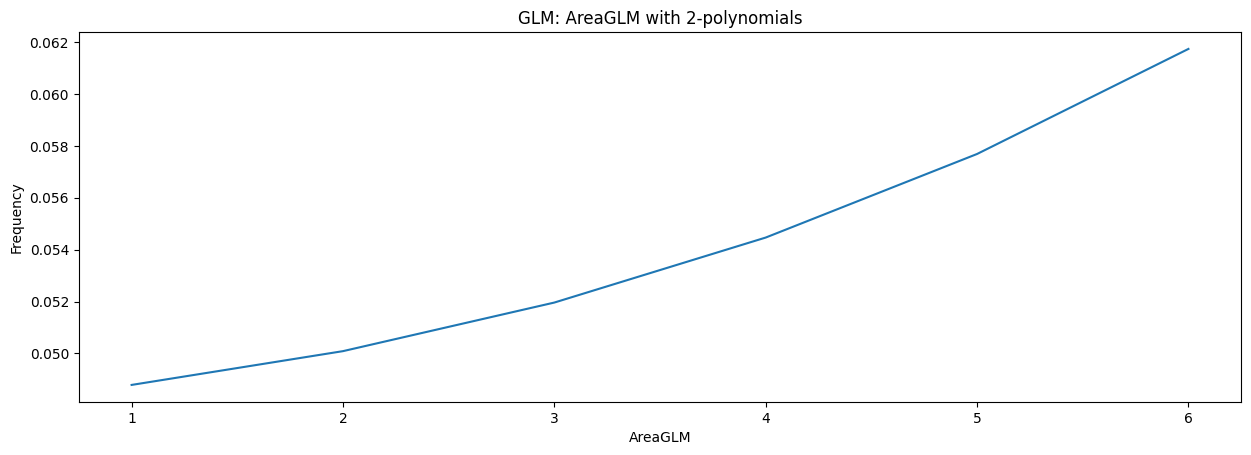

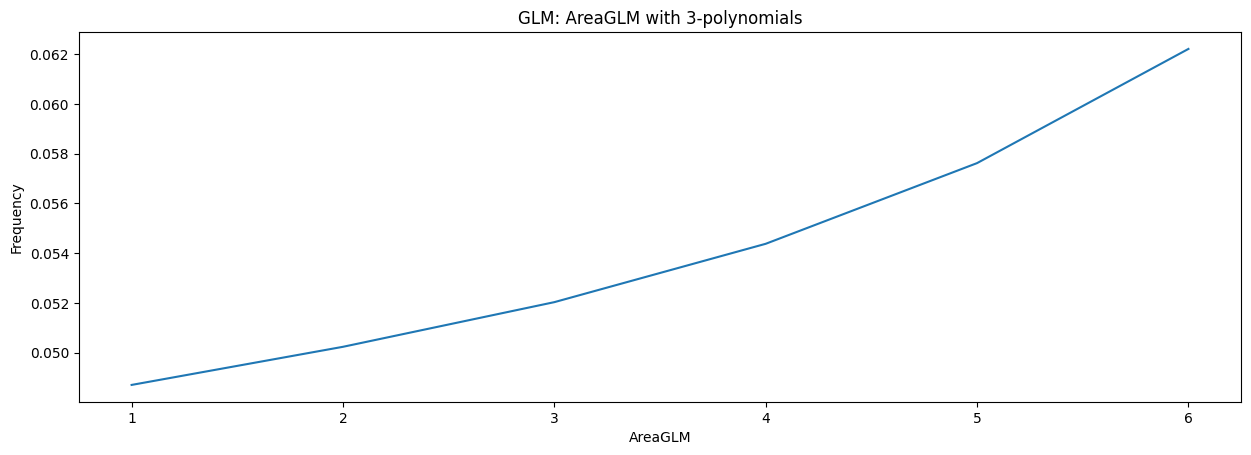

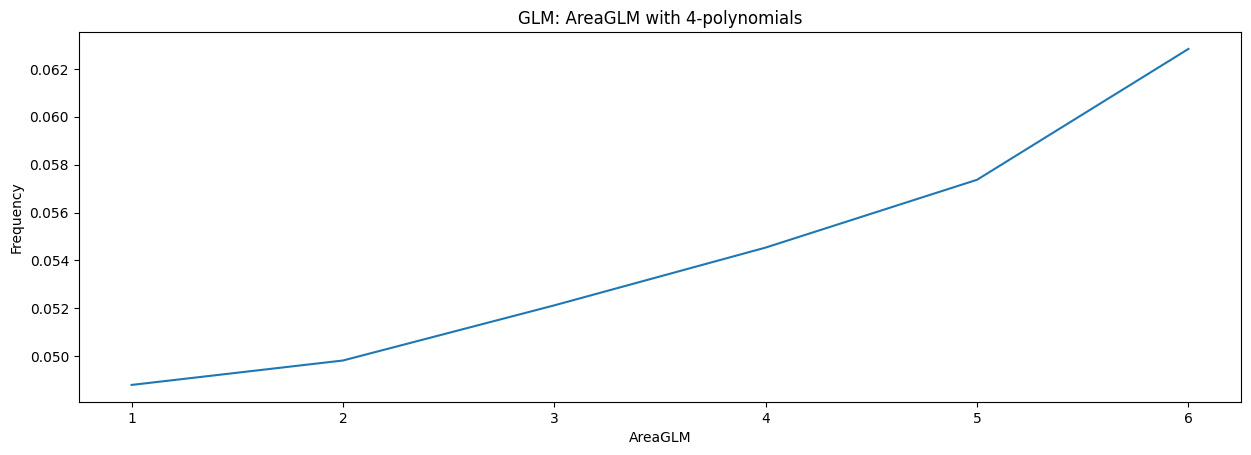

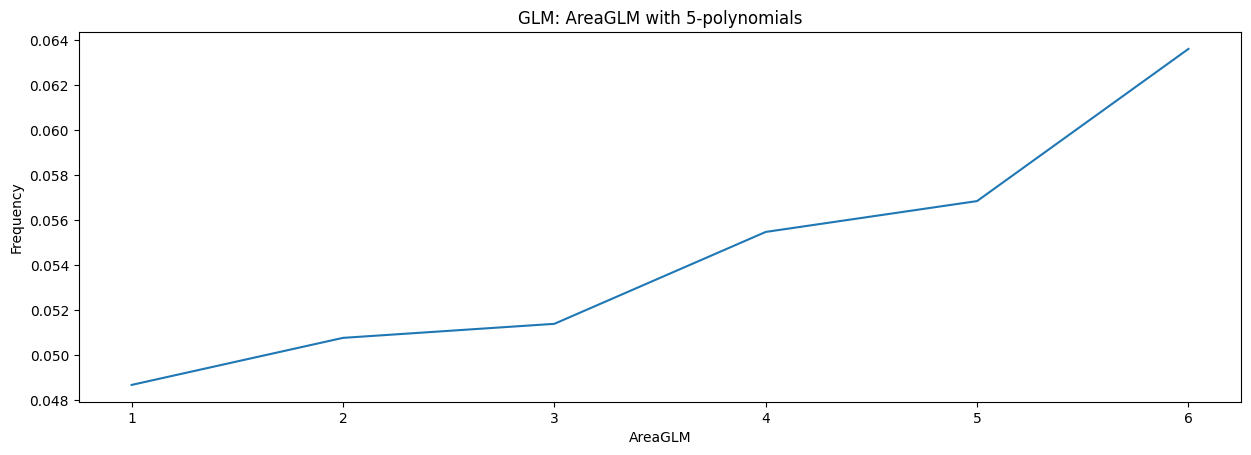

####################################################################################################
Variable: Density

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


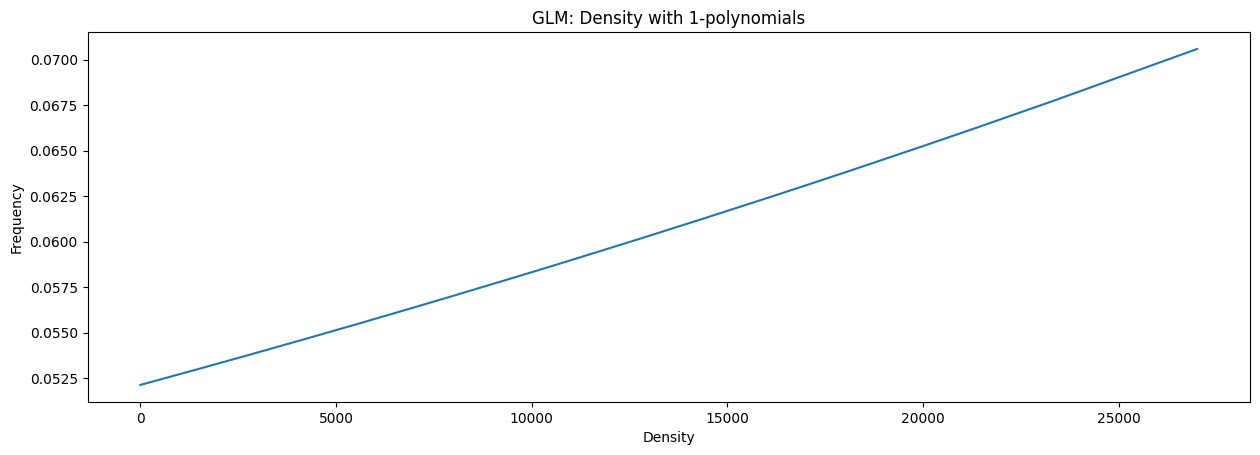

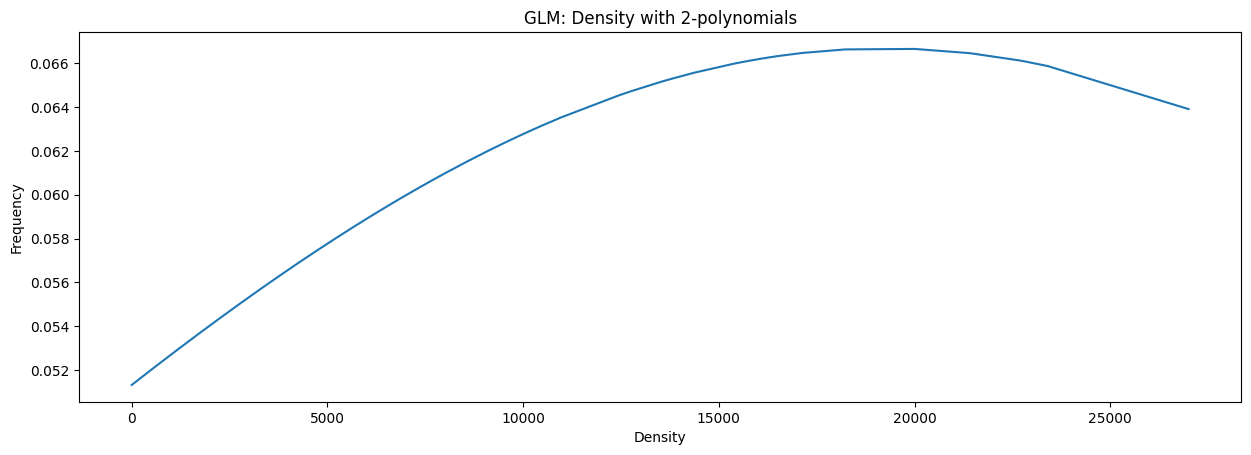

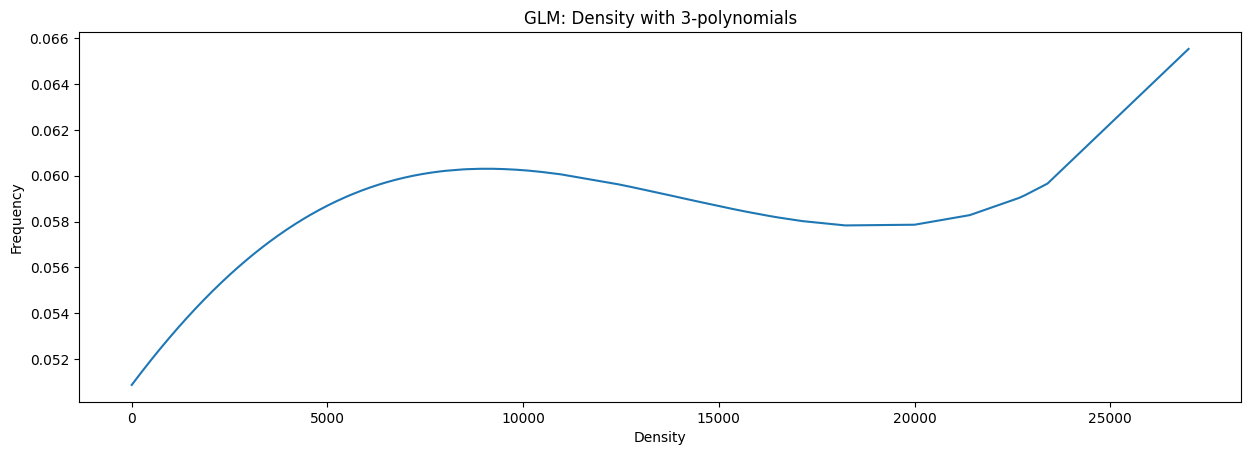

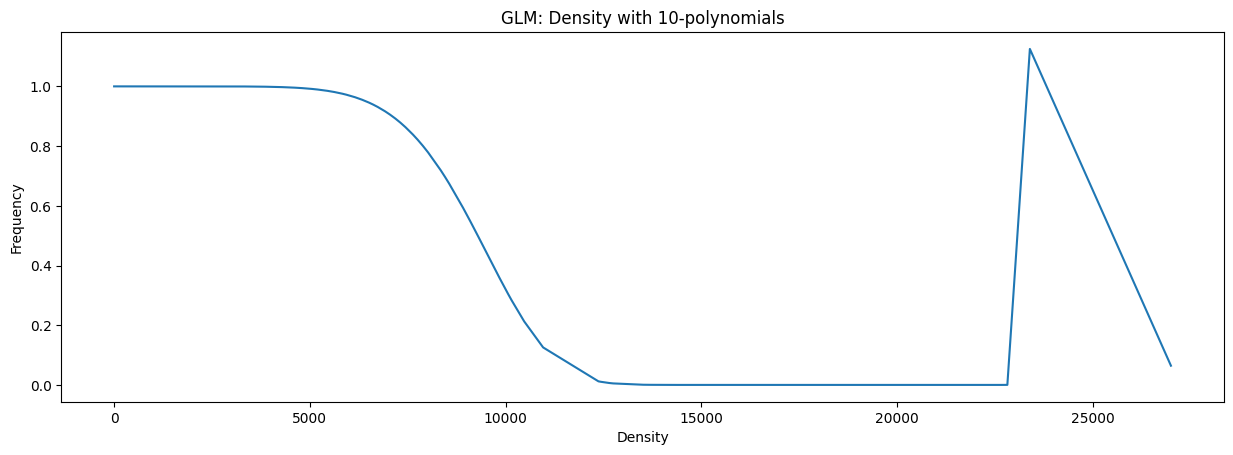

####################################################################################################
Variable: BonusMalus

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


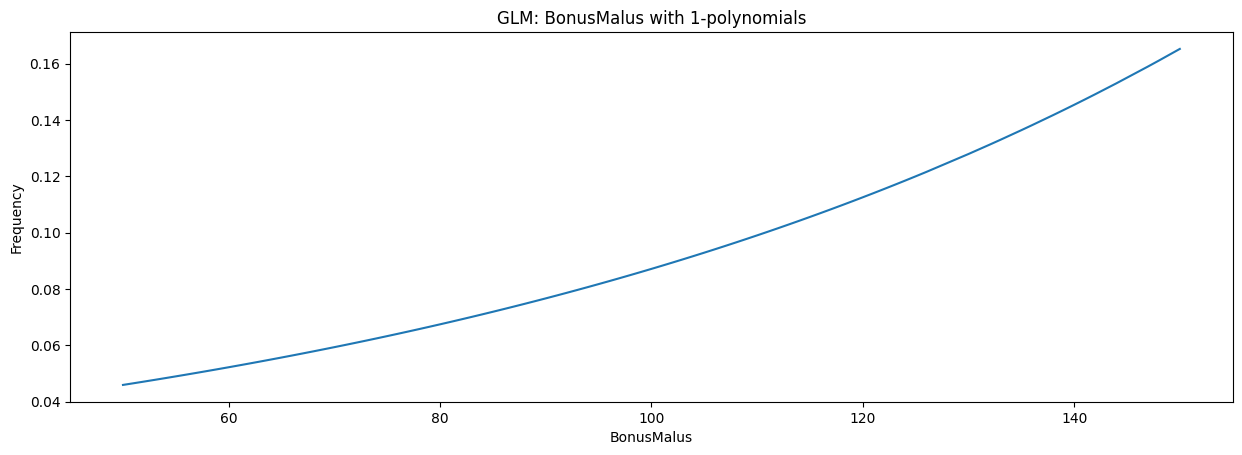

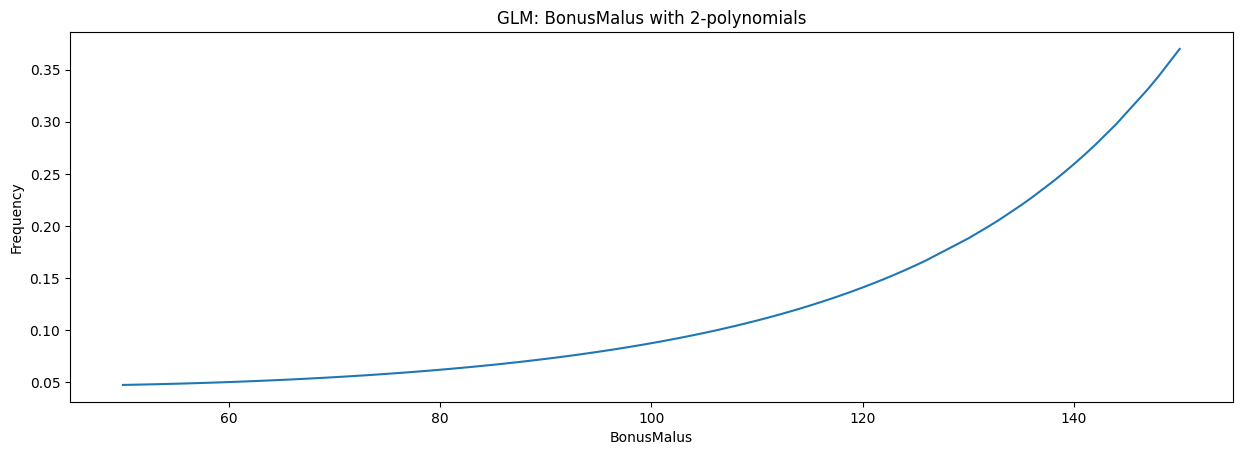

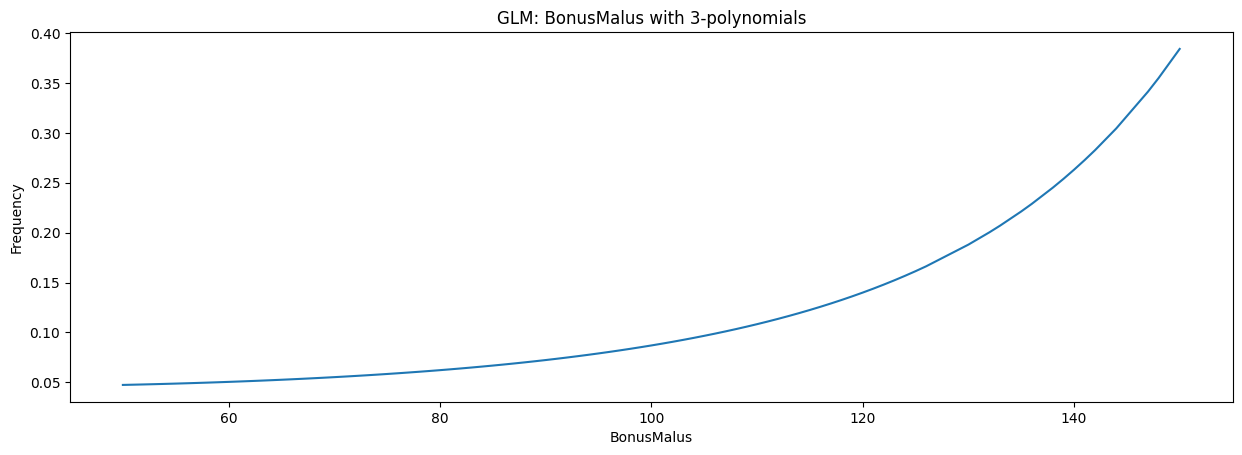

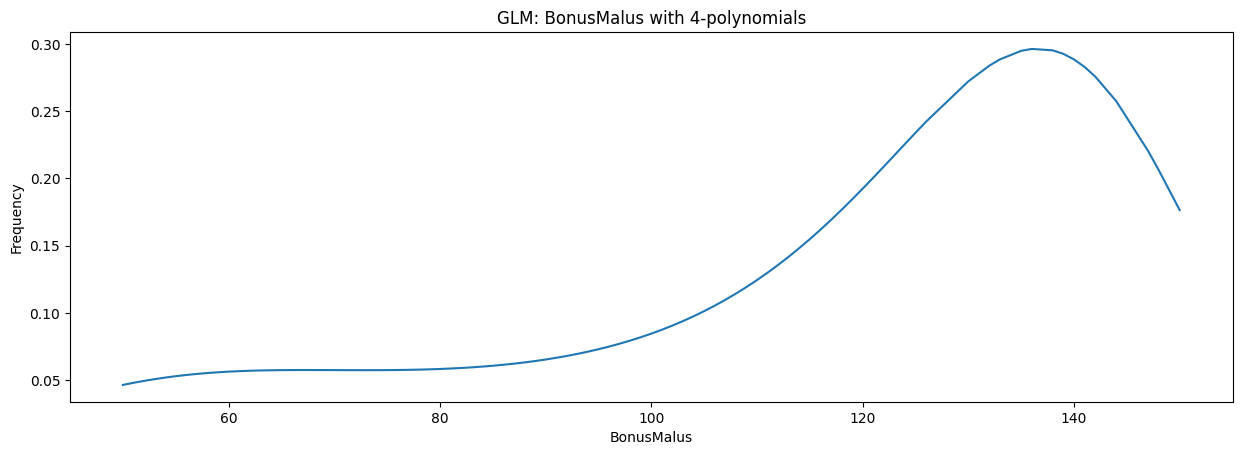

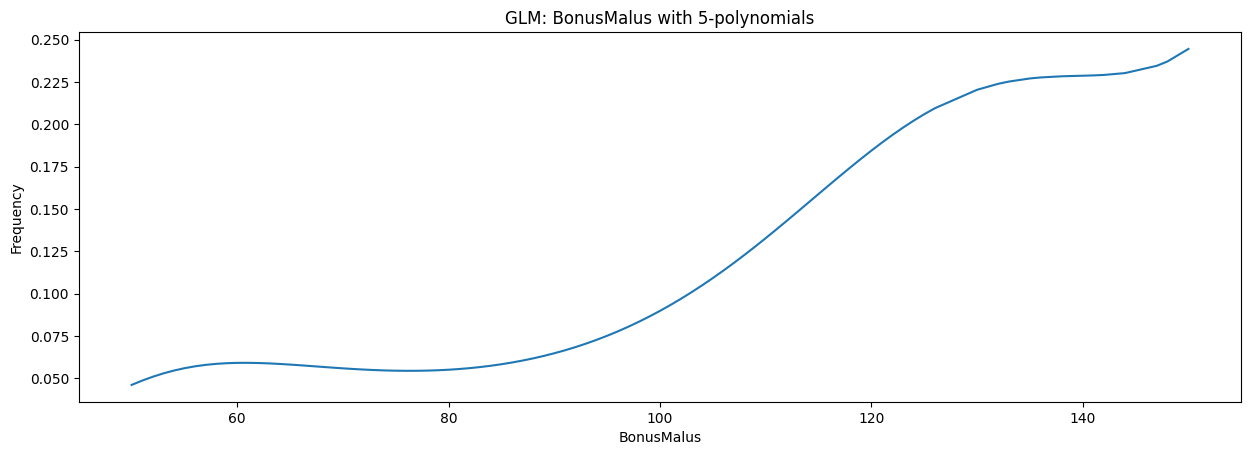

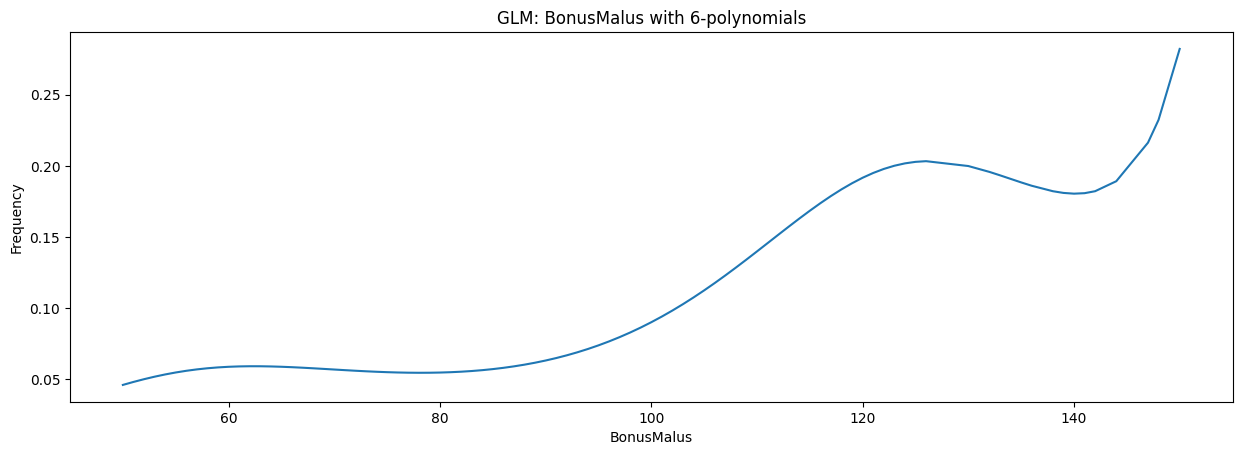

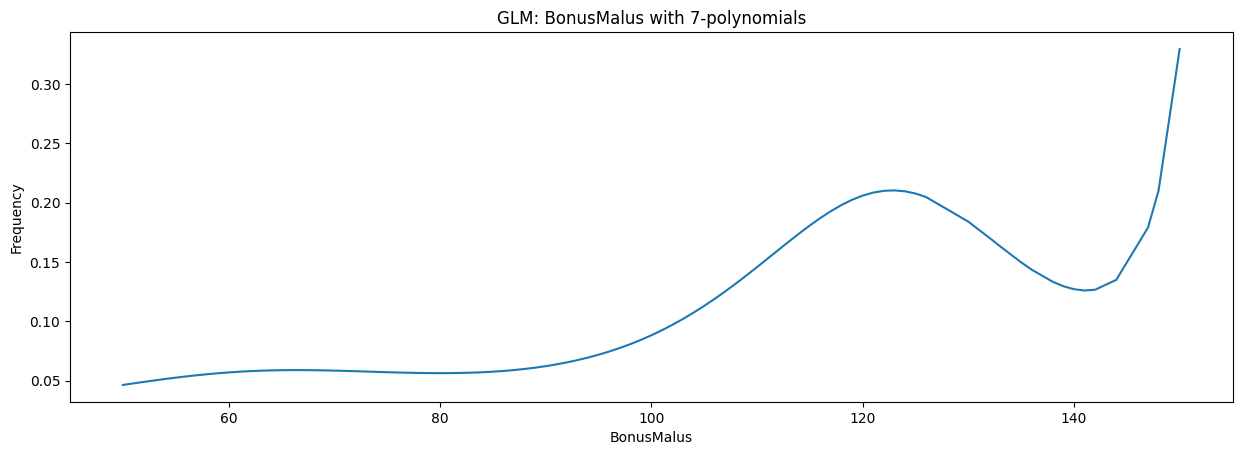

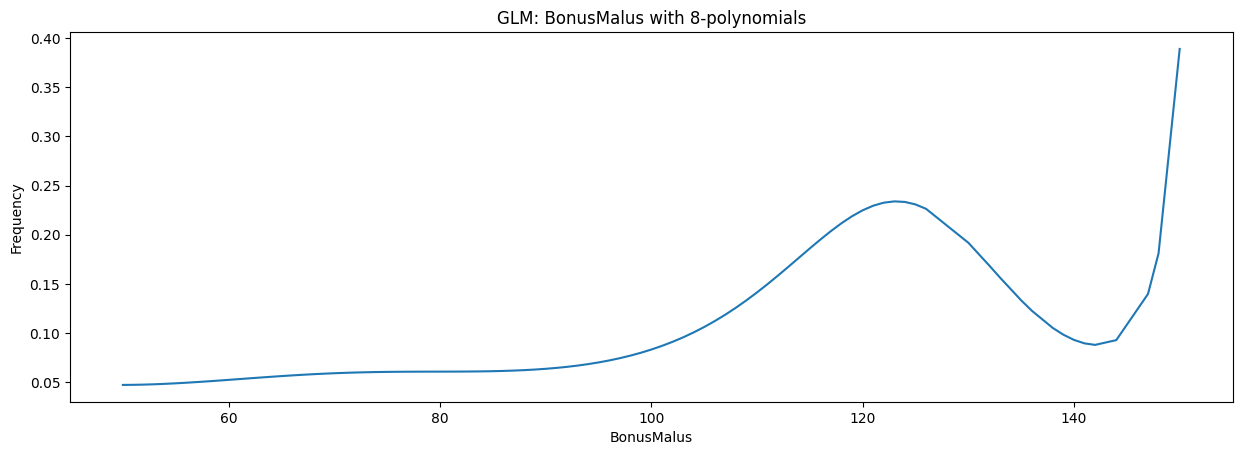

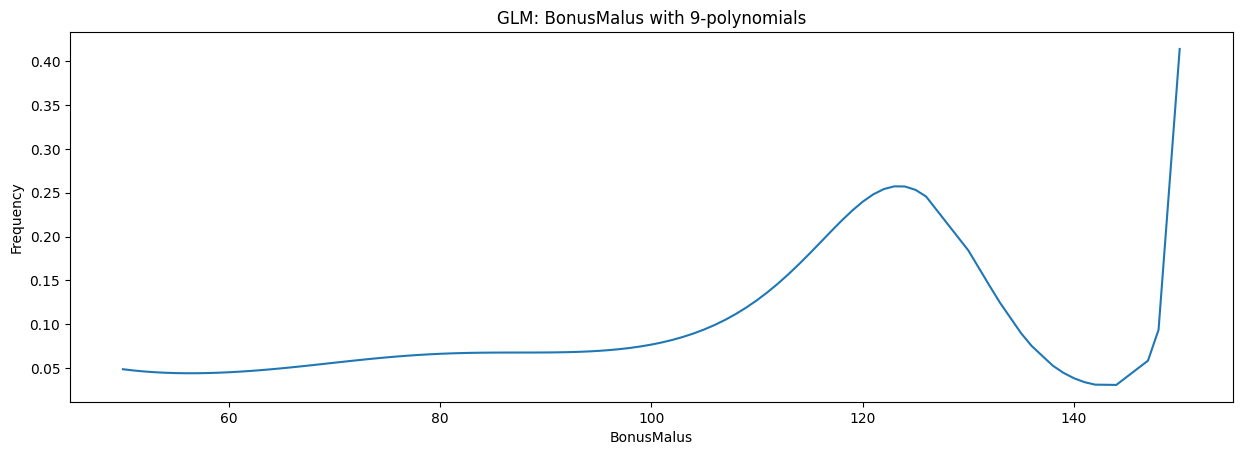

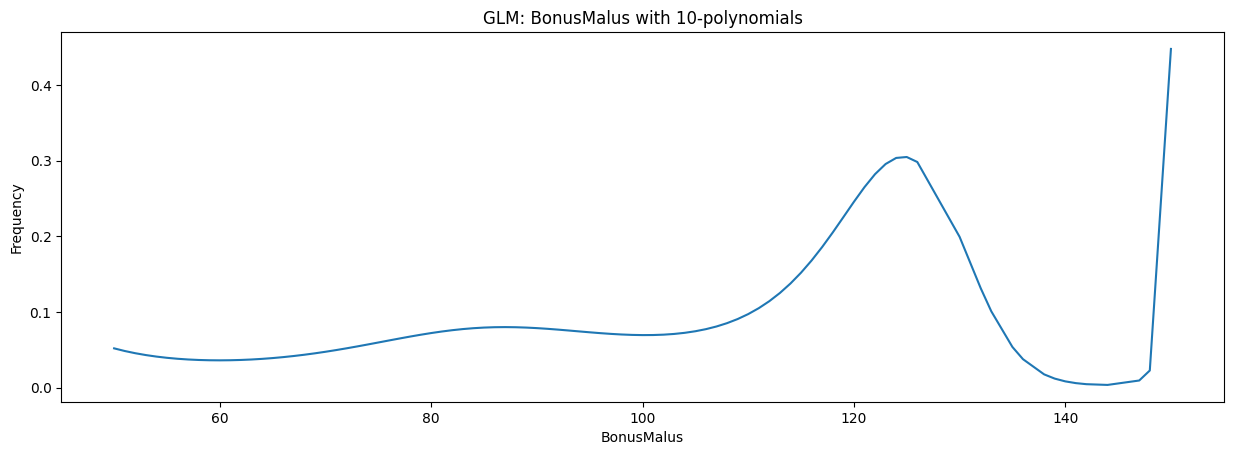

####################################################################################################
Variable: BonusMalusGLM

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


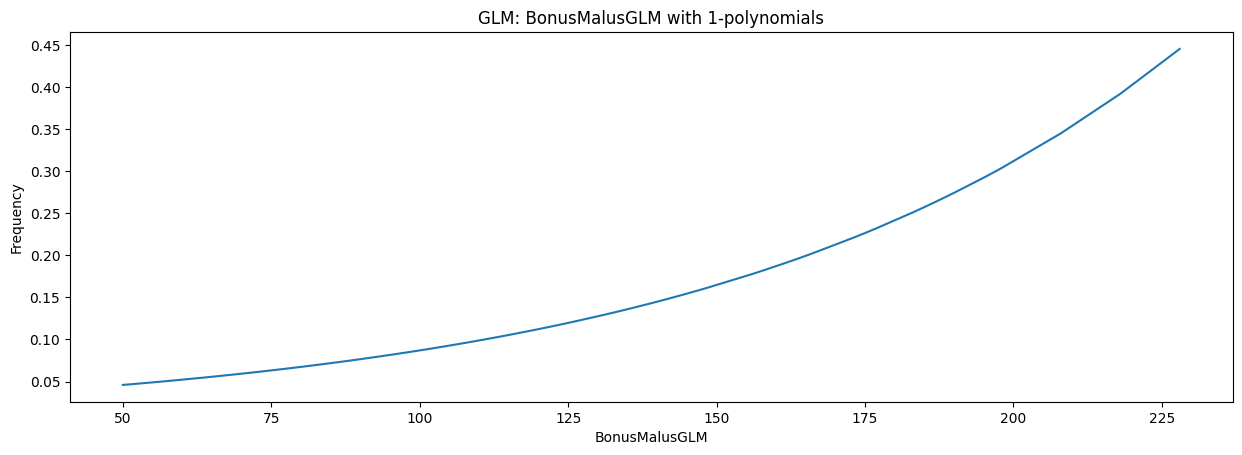

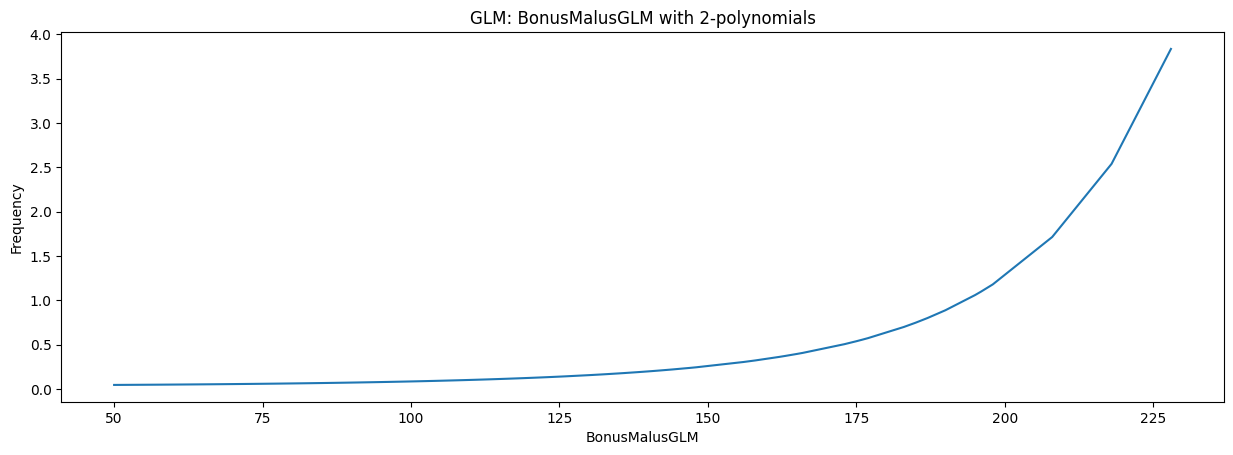

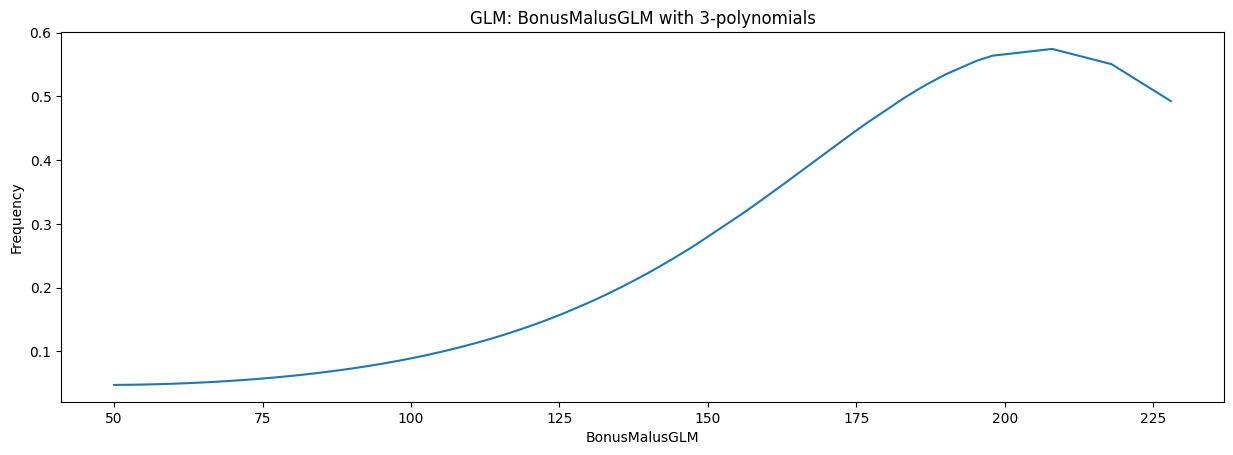

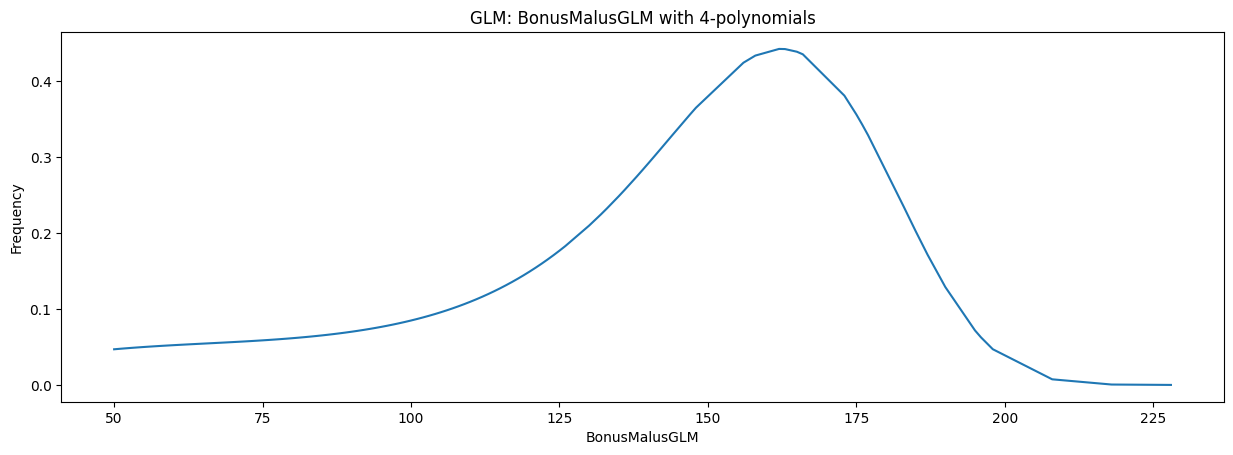

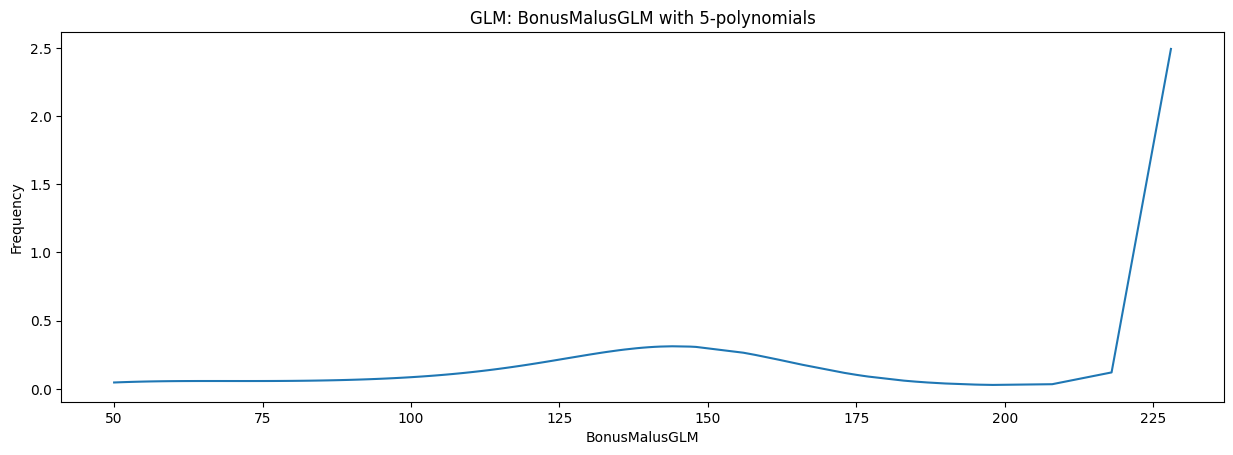

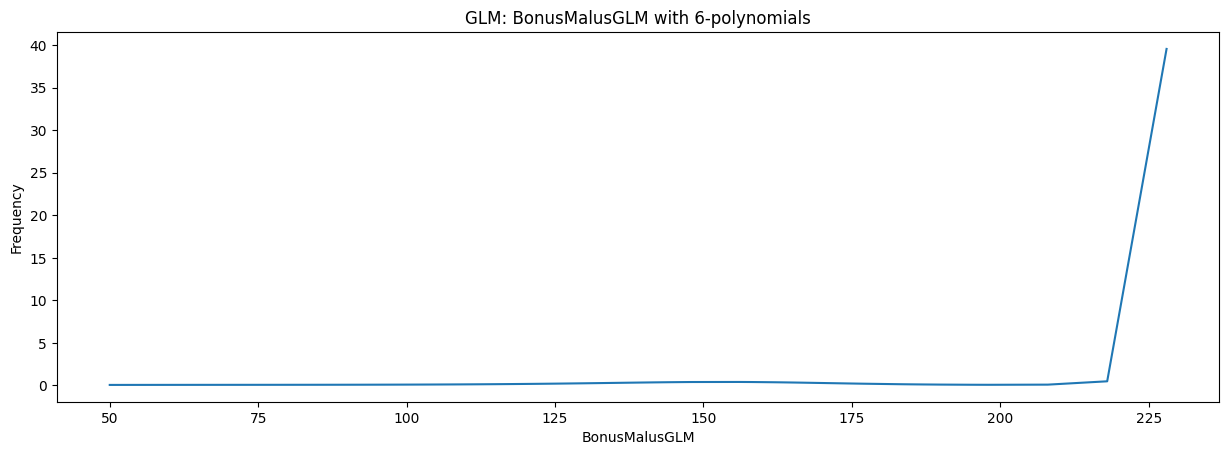

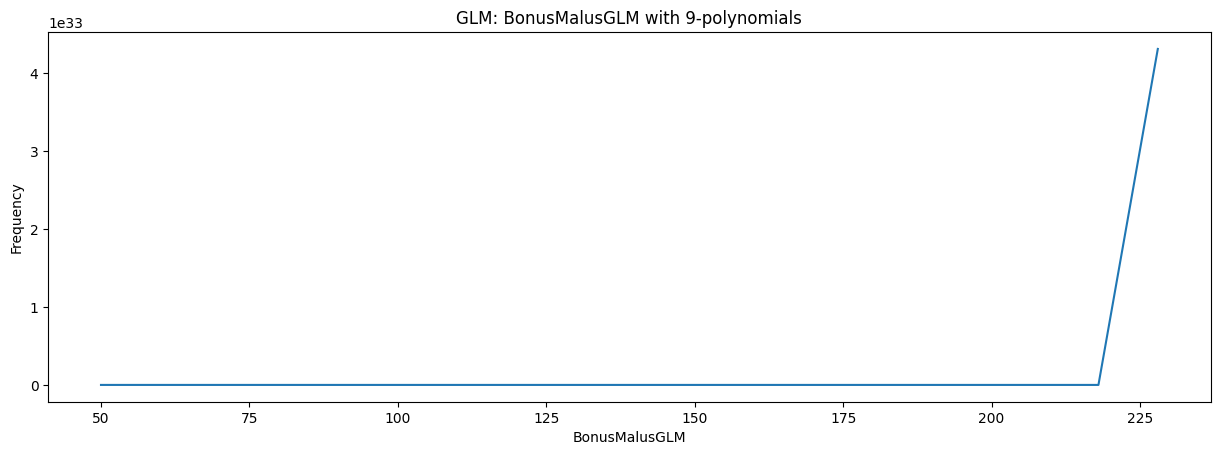

####################################################################################################
Variable: VehPower

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


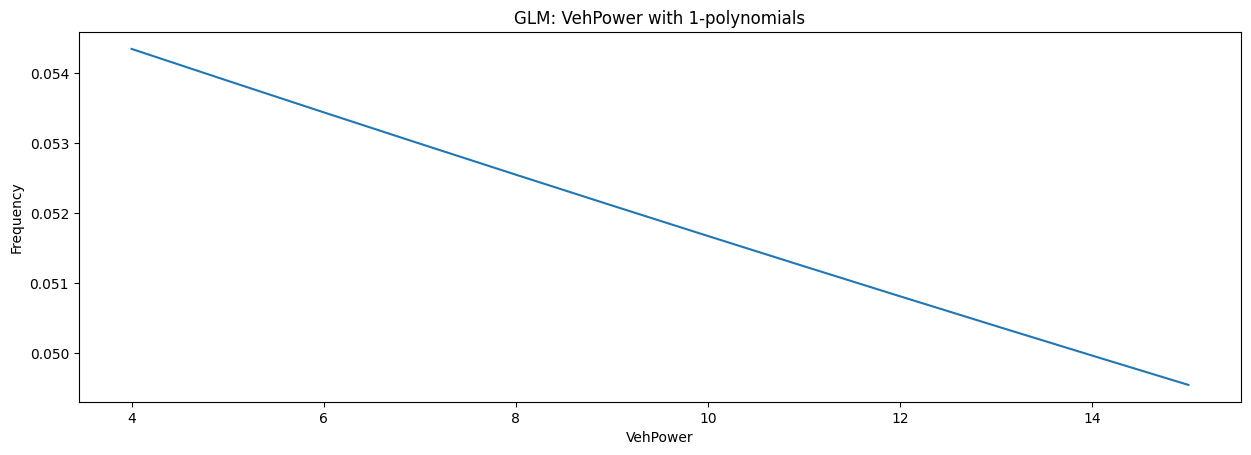

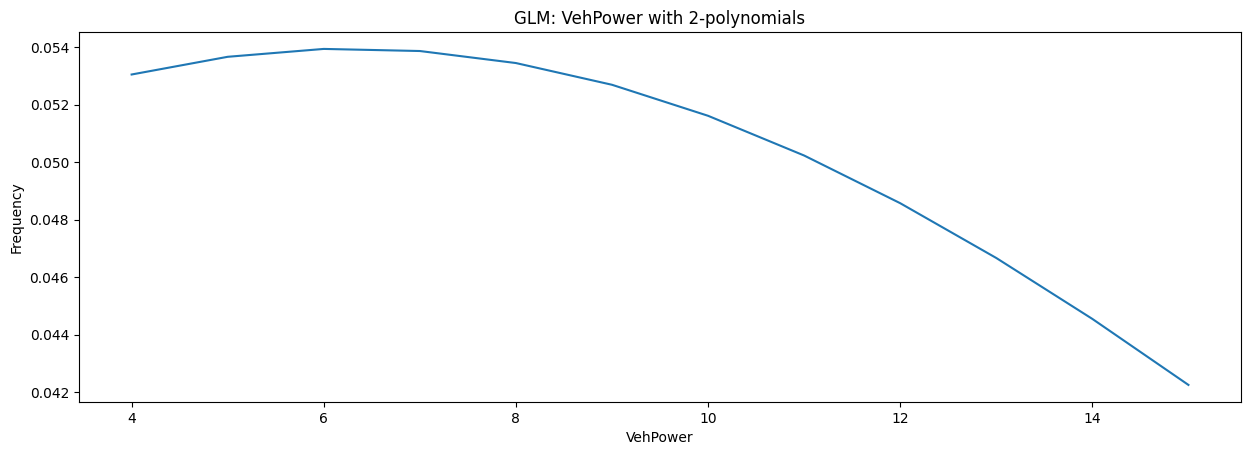

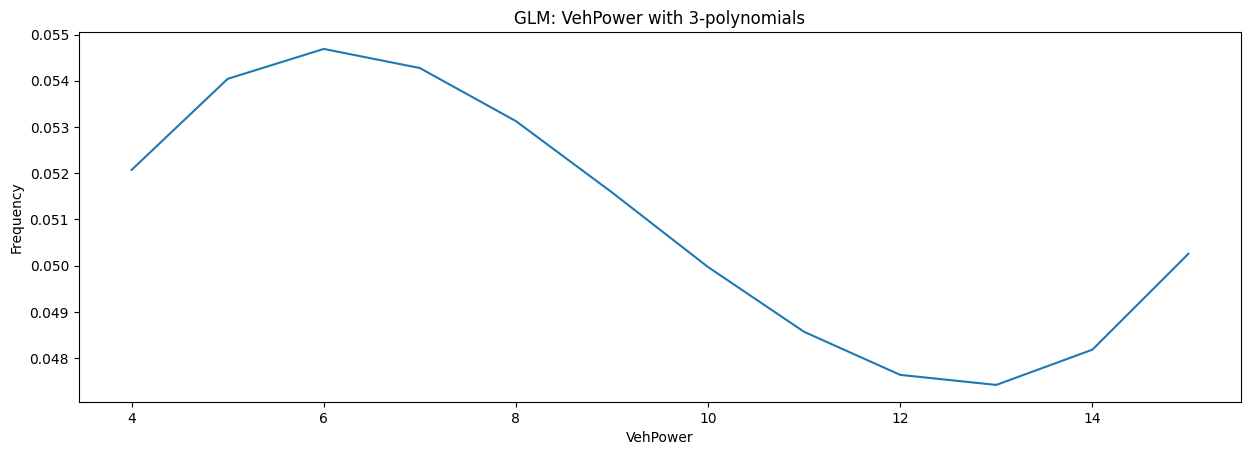

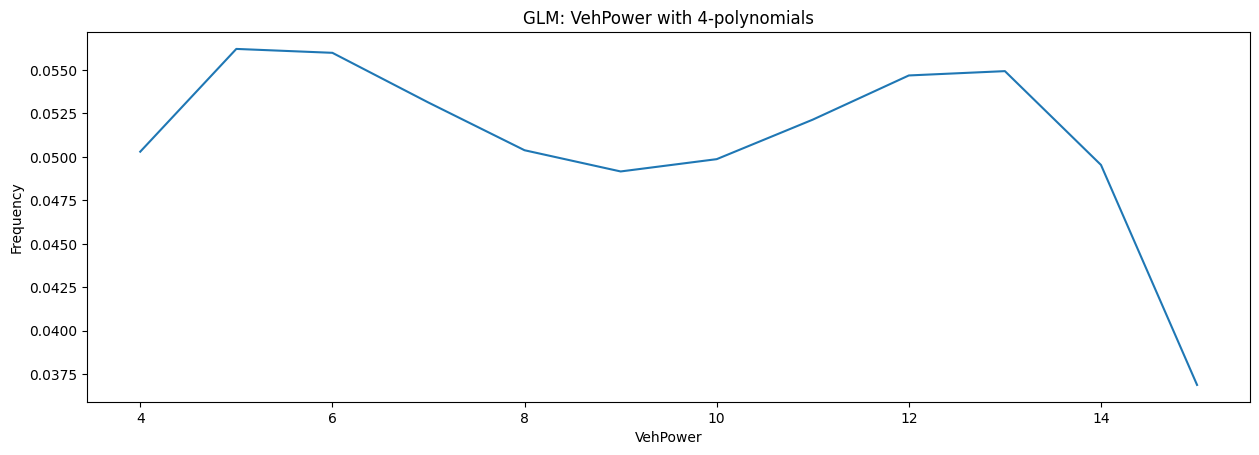

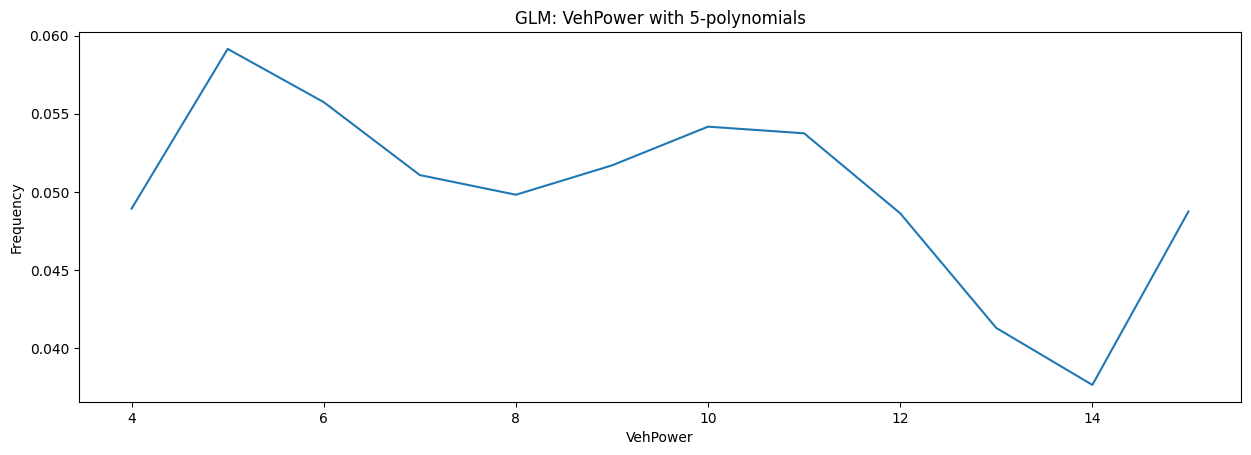

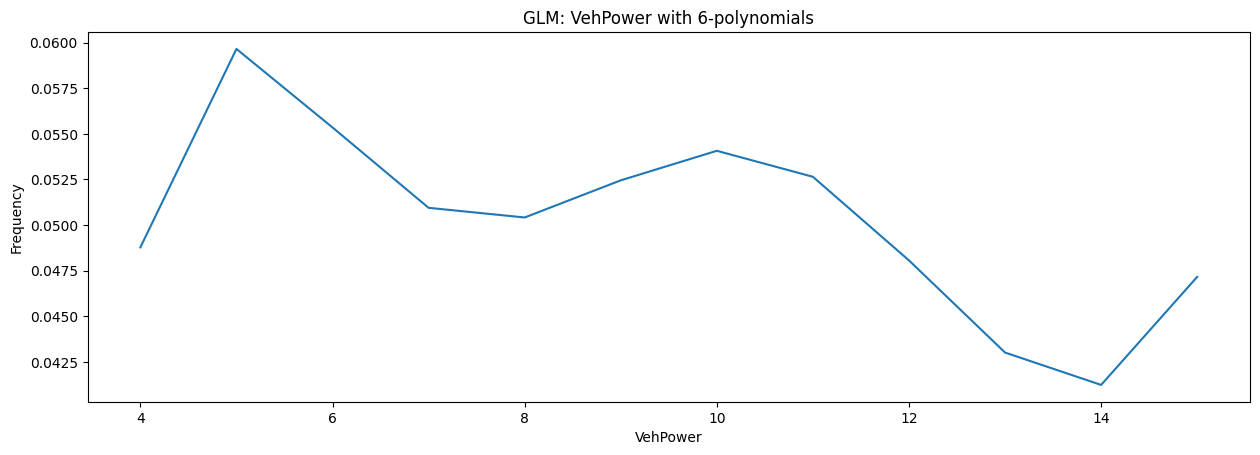

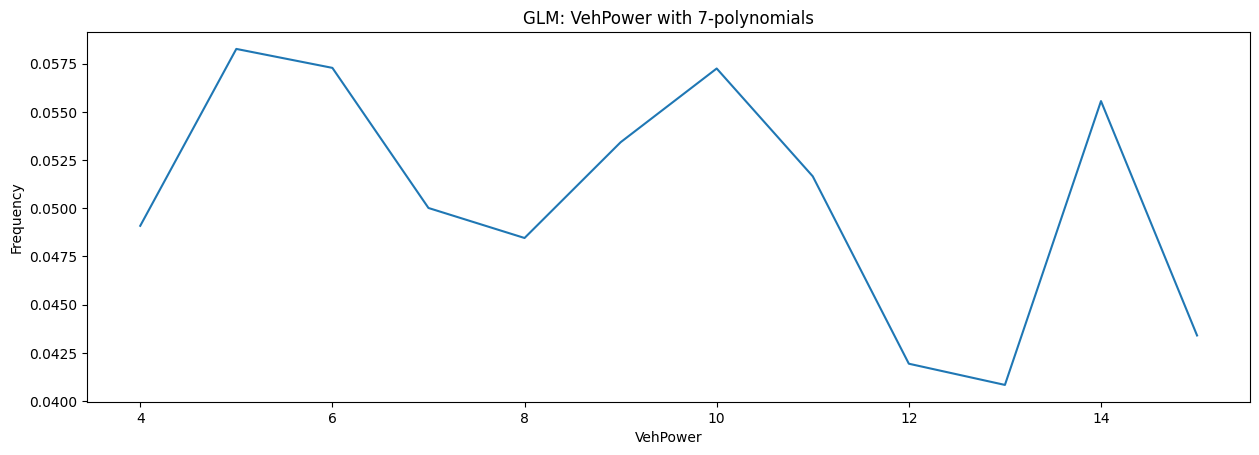

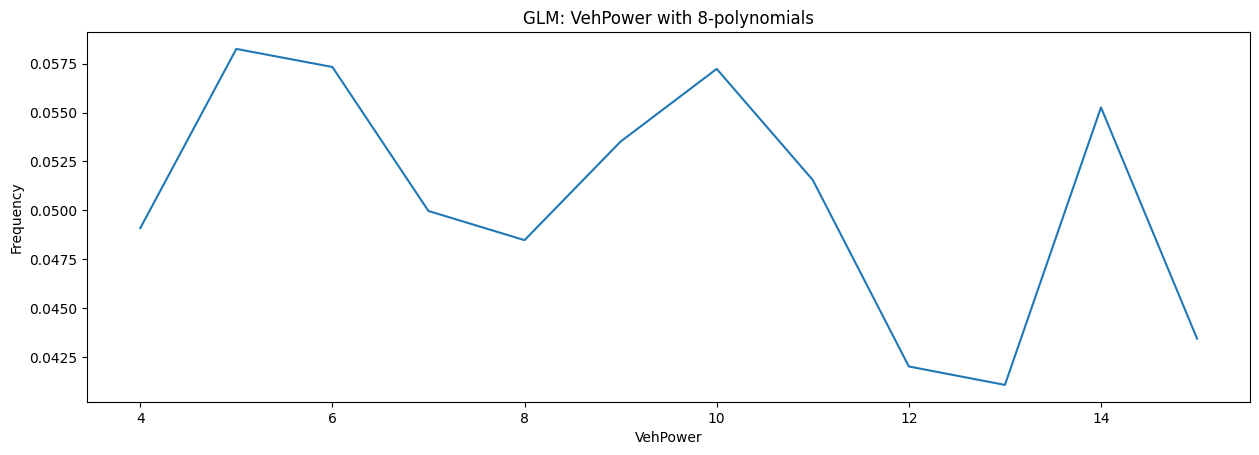

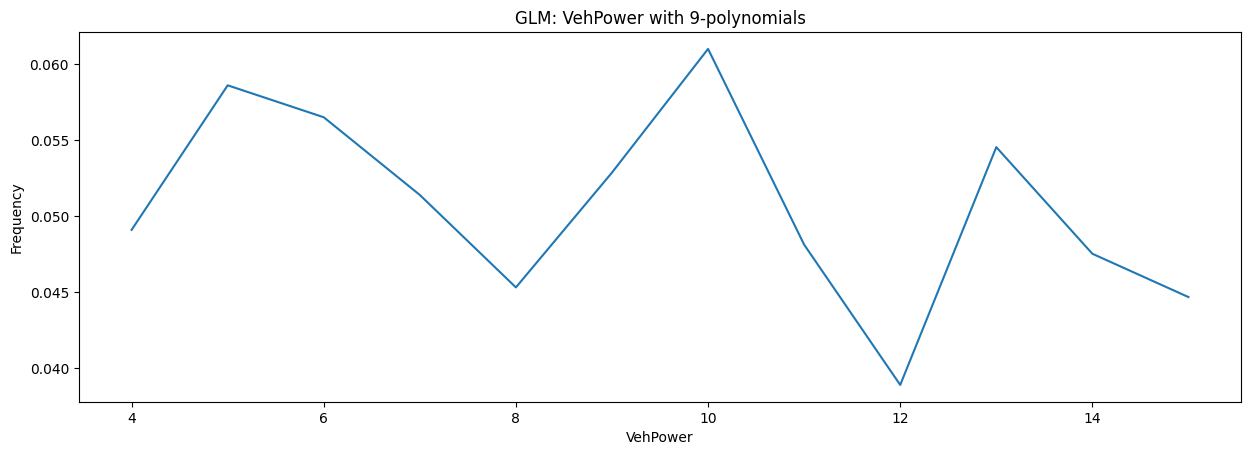

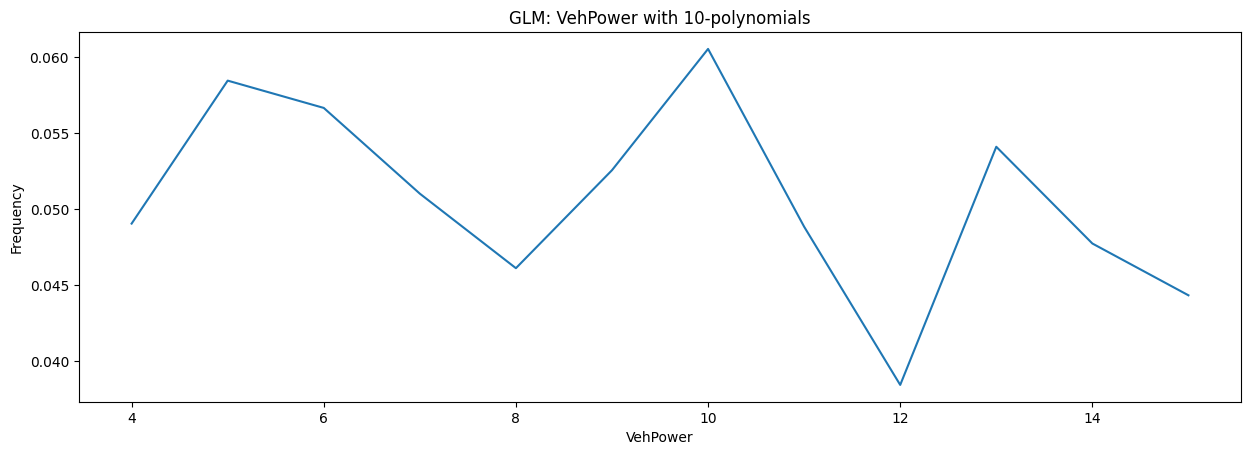

####################################################################################################
Variable: VehAge

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


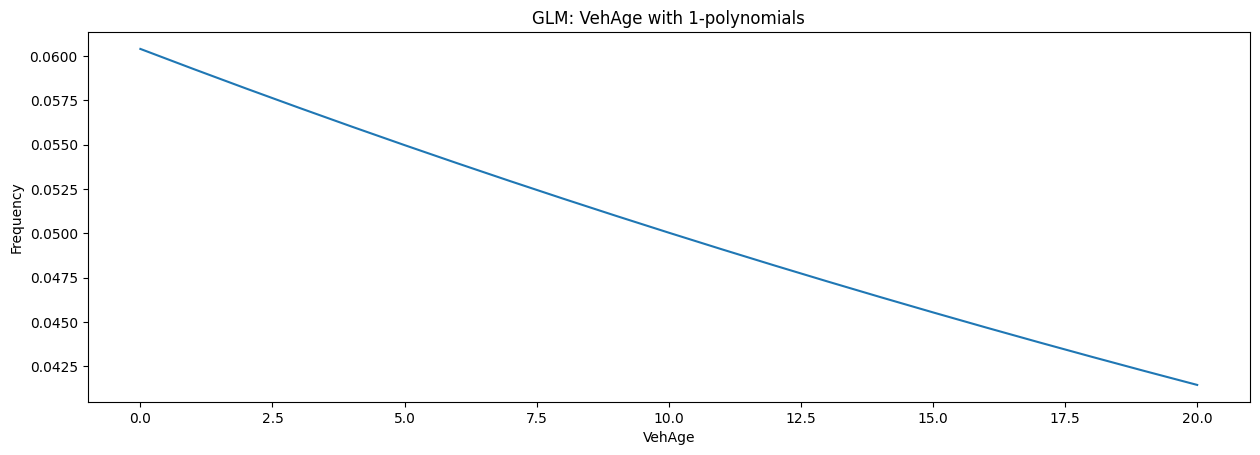

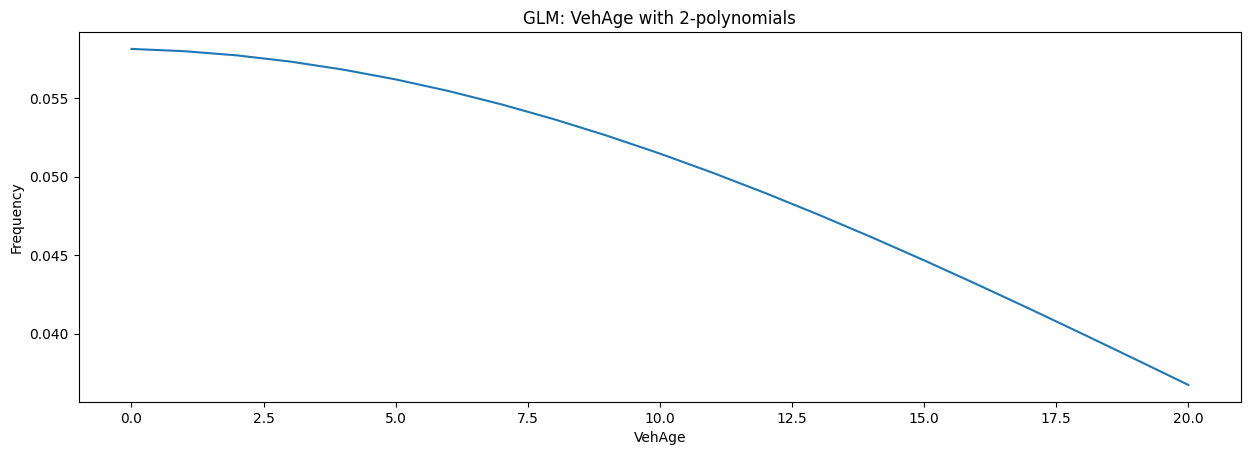

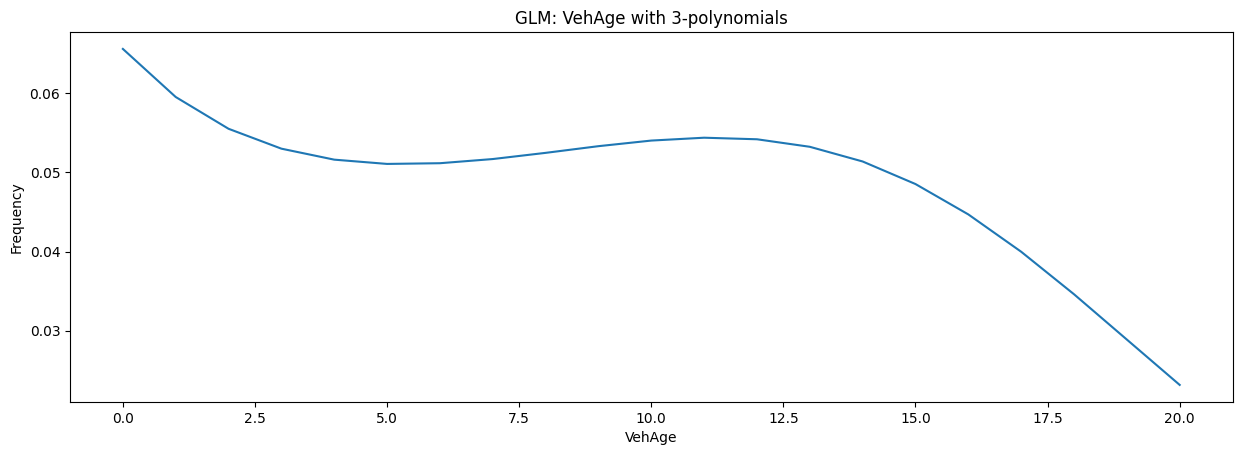

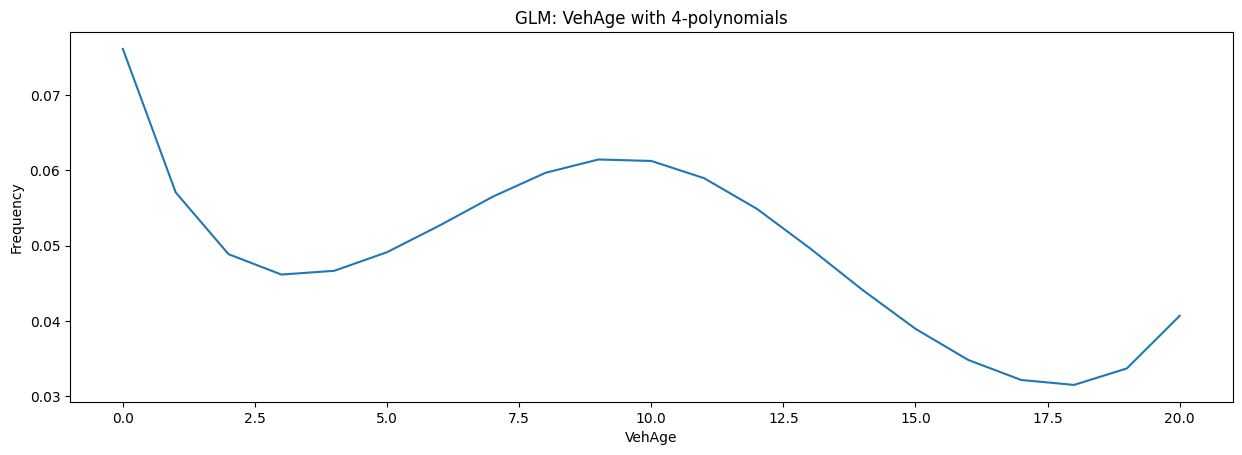

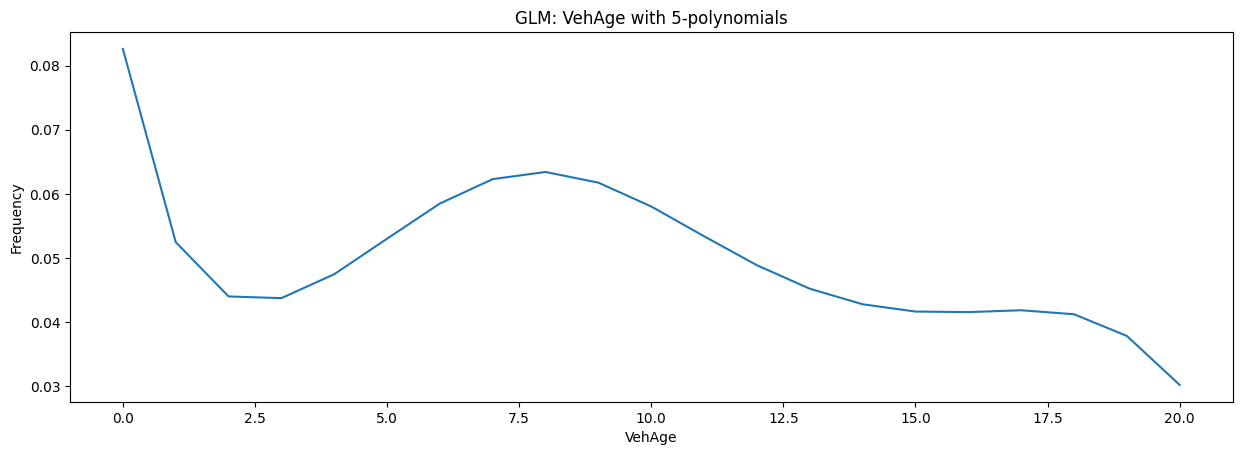

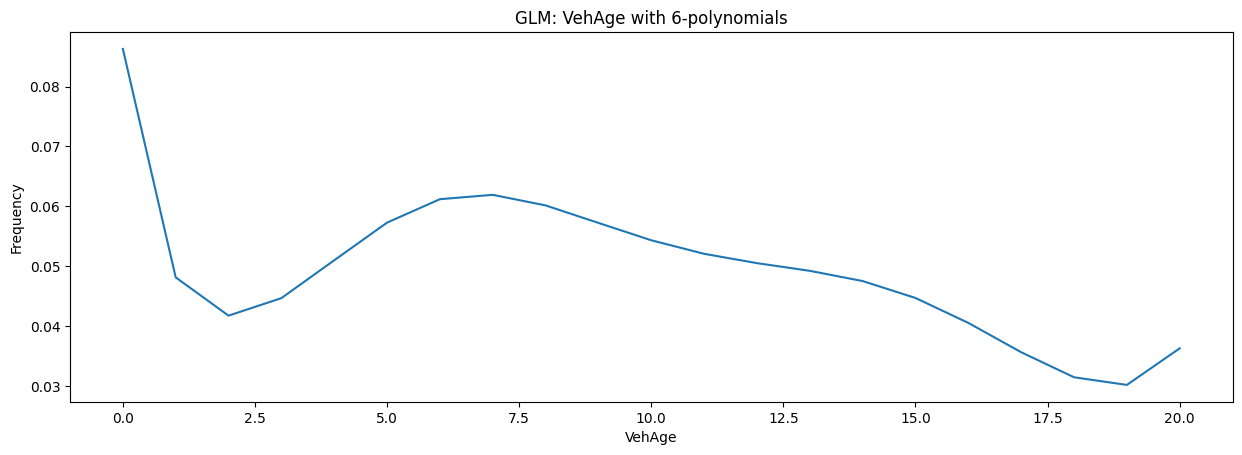

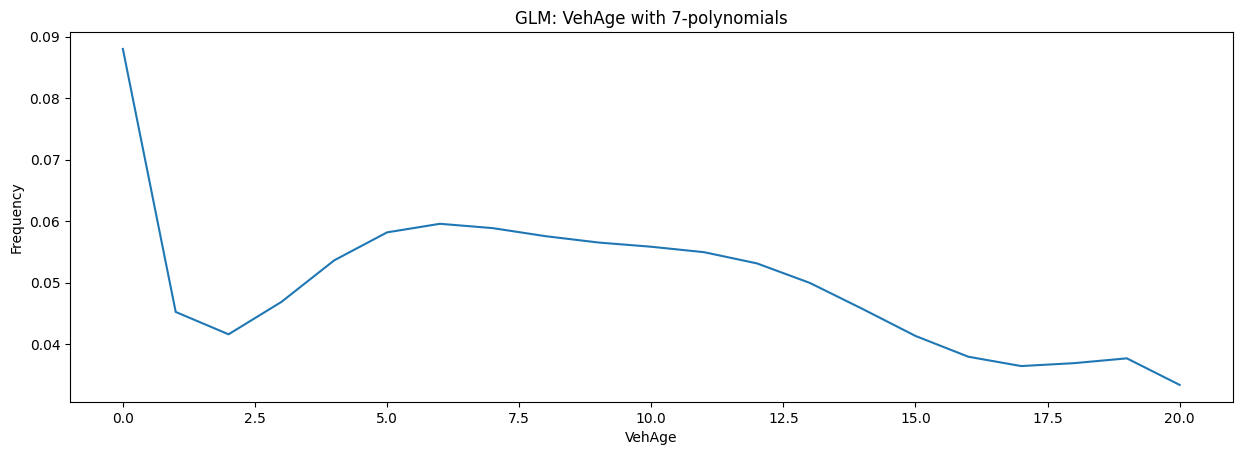

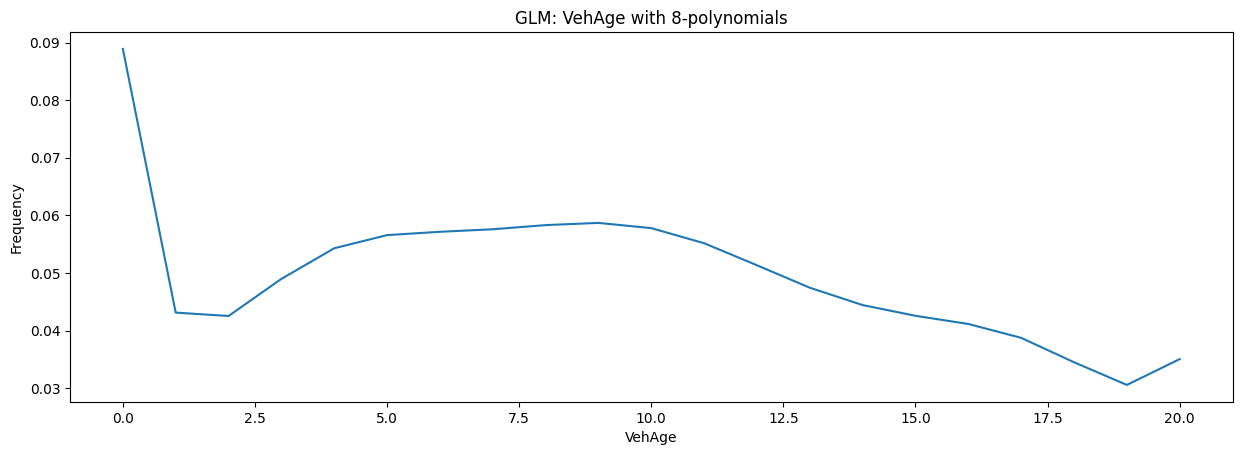

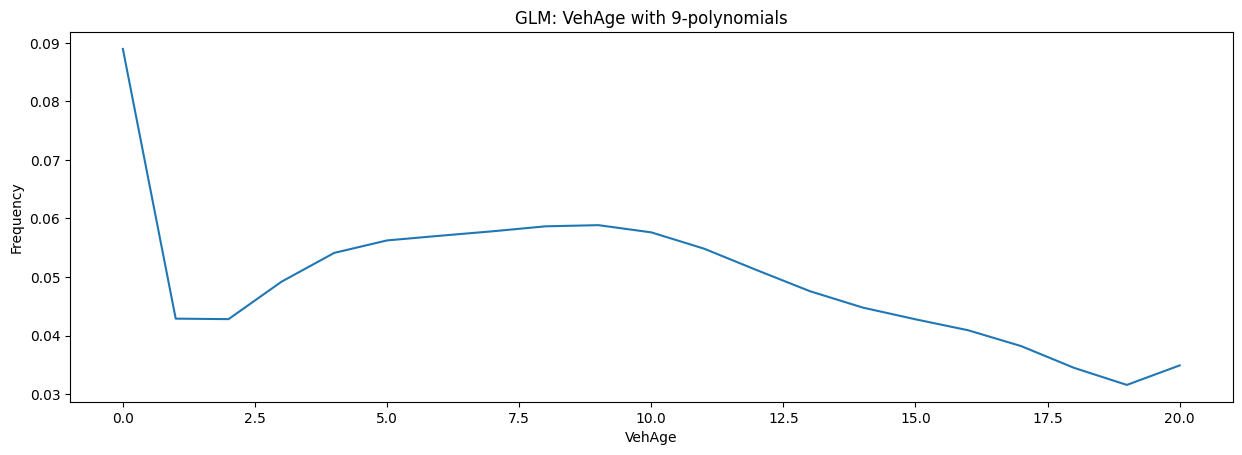

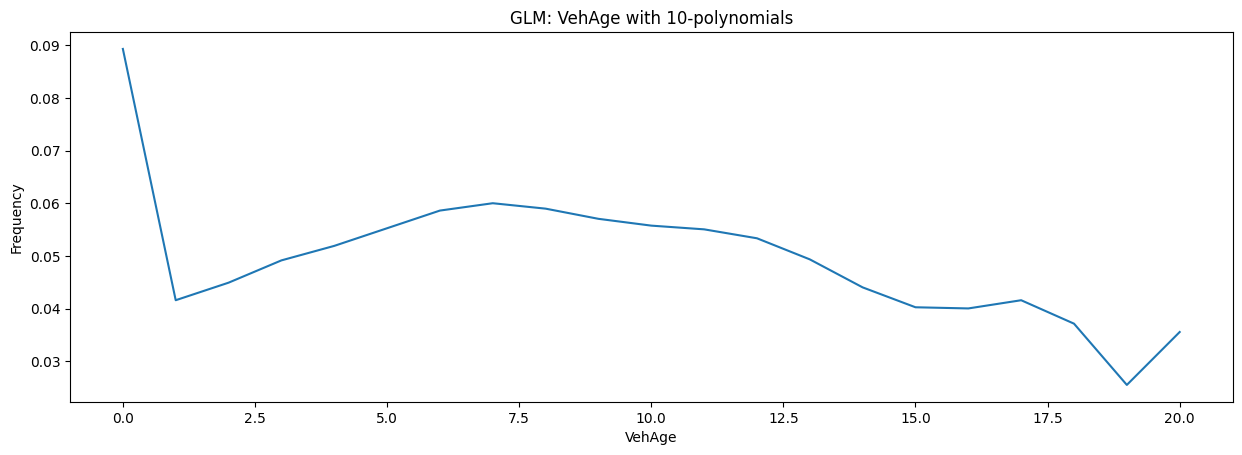

####################################################################################################
Variable: DrivAge

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


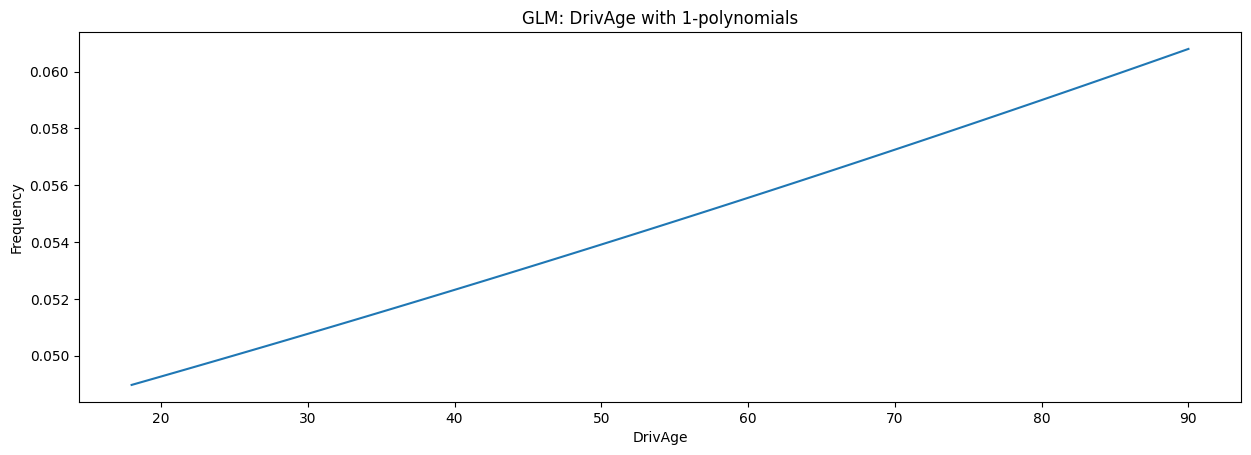

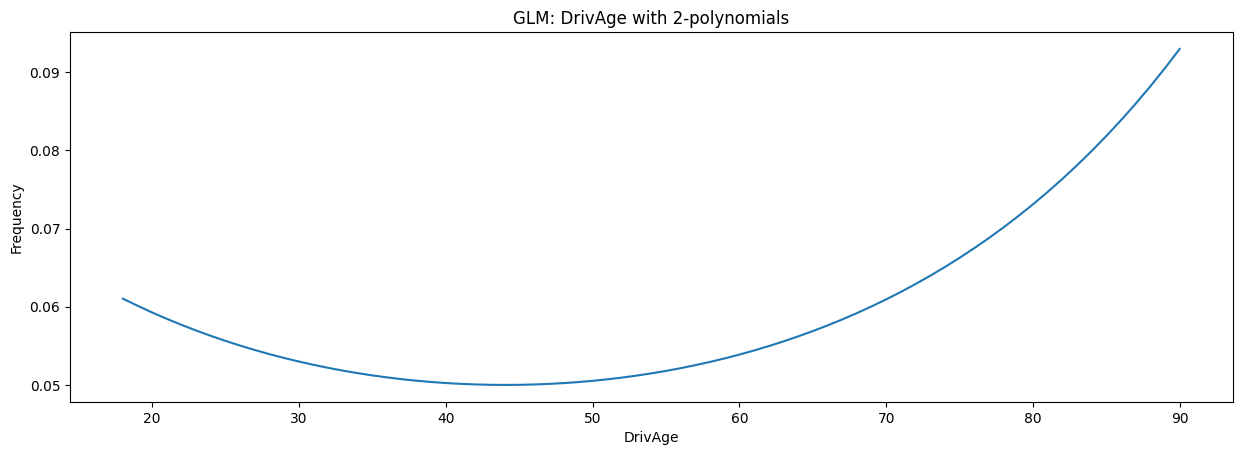

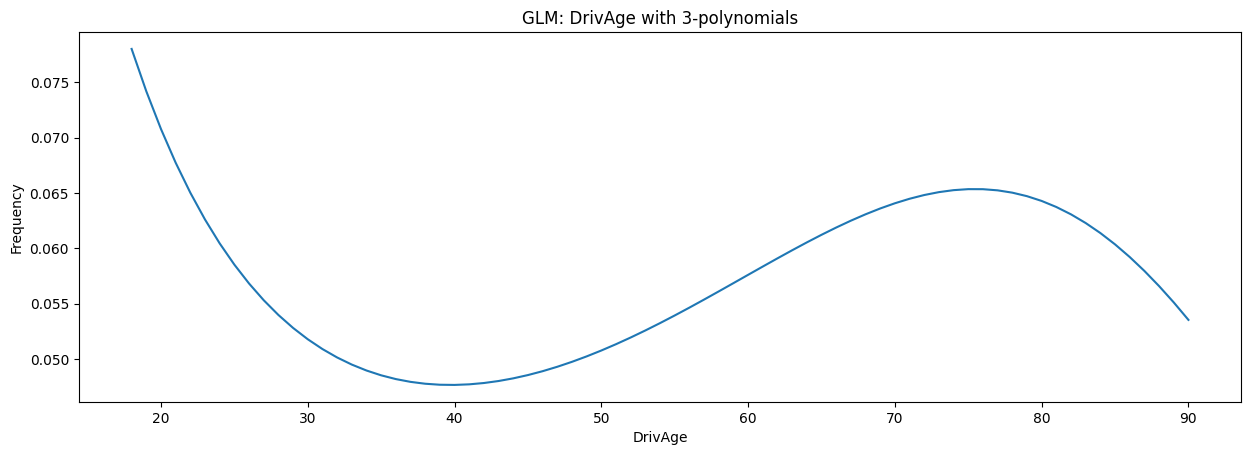

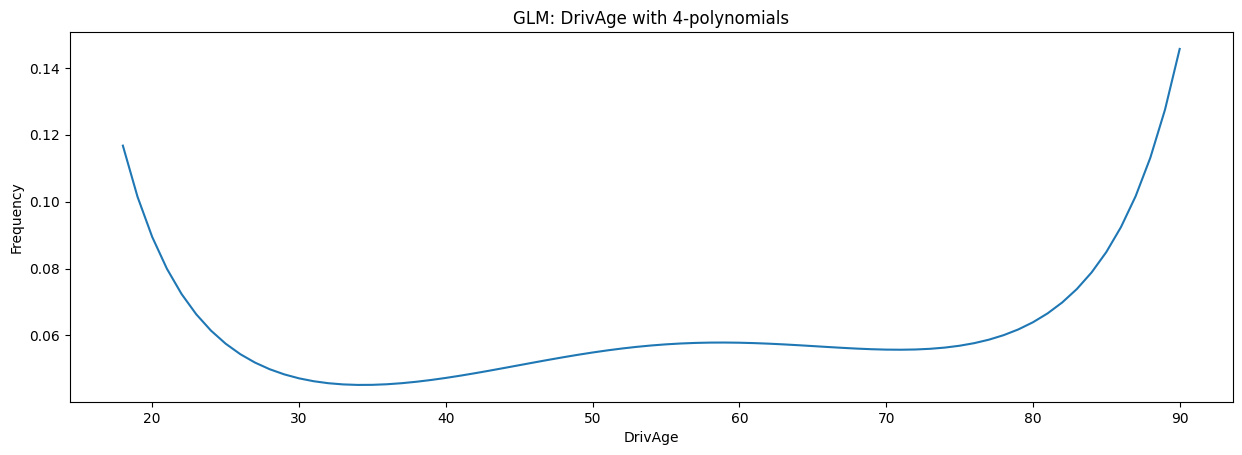

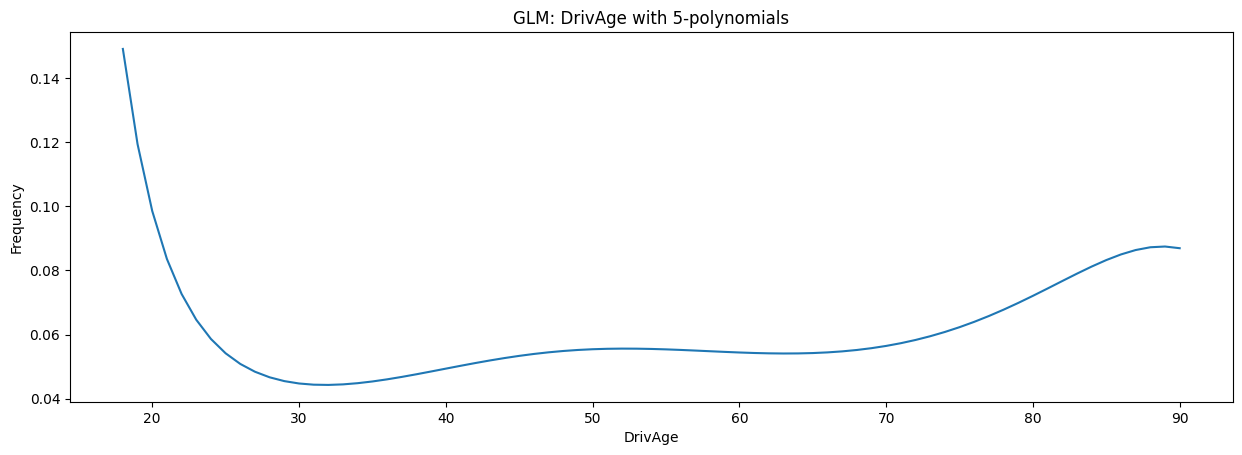

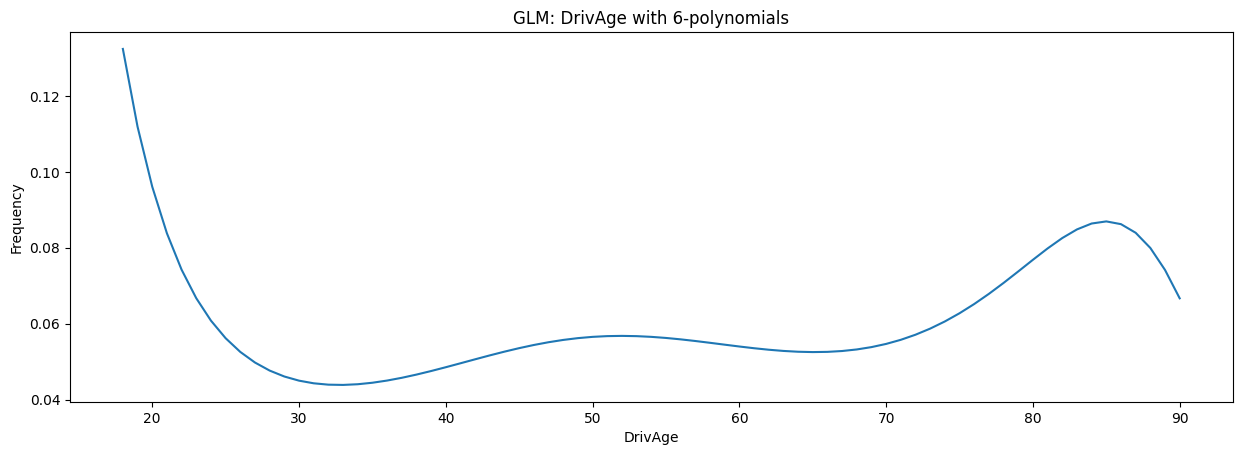

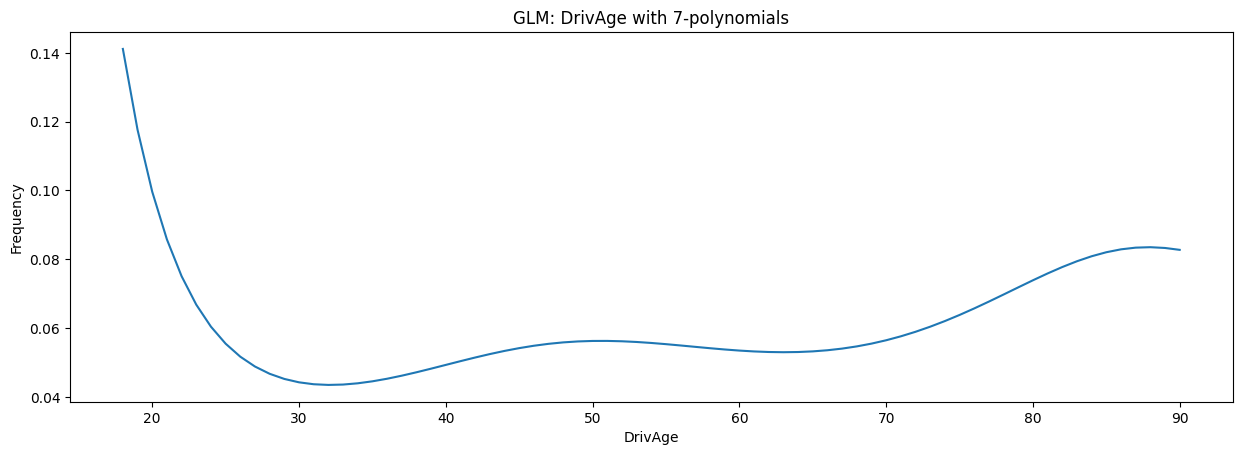

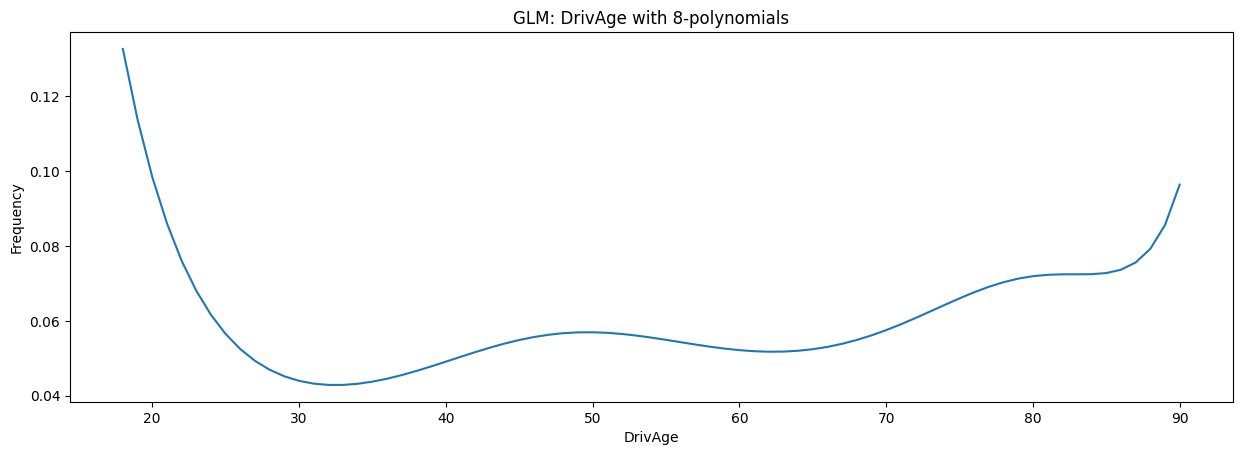

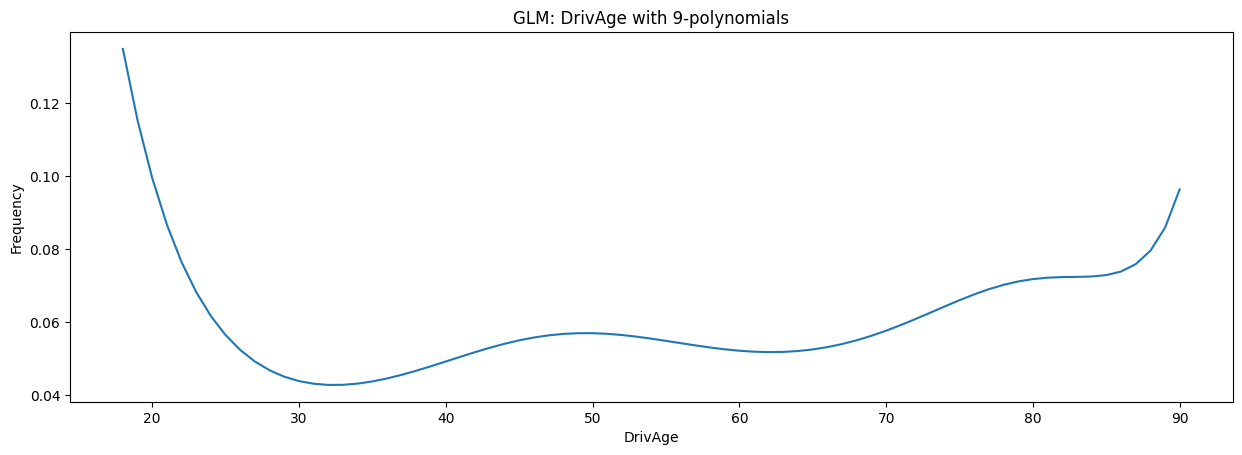

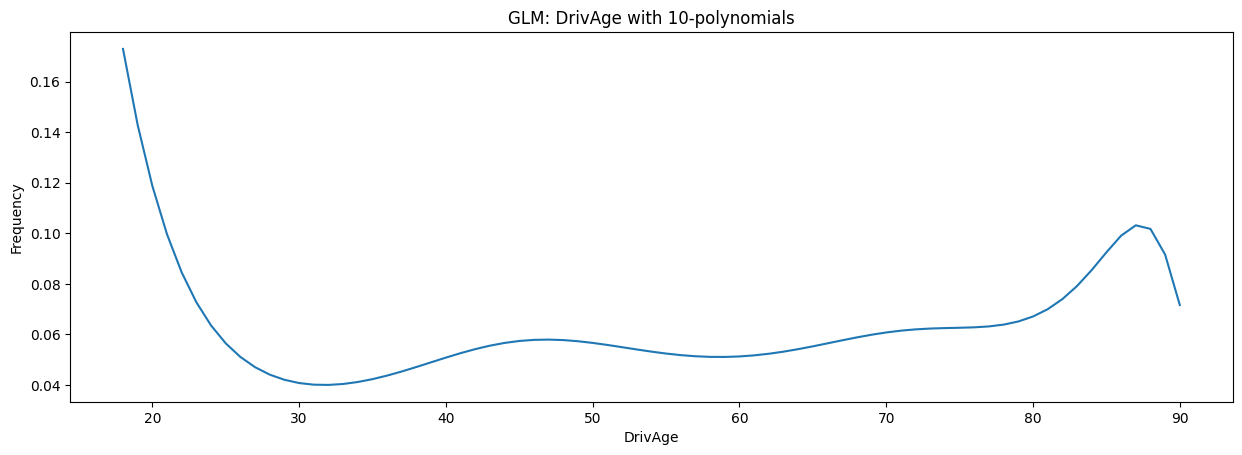

####################################################################################################


In [111]:
# Here the relationship plots.
# Per variable, please choose one that best represents the assumed relationship between the variables

# Only Code below this line, not necessary to read

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [1]:
freq_expert2 = pd.read_pickle('./data/common_dataprep/train.pickle')

NameError: name 'pd' is not defined

In [7]:
freq_expert2.groupby('VehGas')[['ClaimNb']].mean()

ClaimNb
VehGas           
Diesel   0.050141
Regular  0.056224

Variable: AreaGLM

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


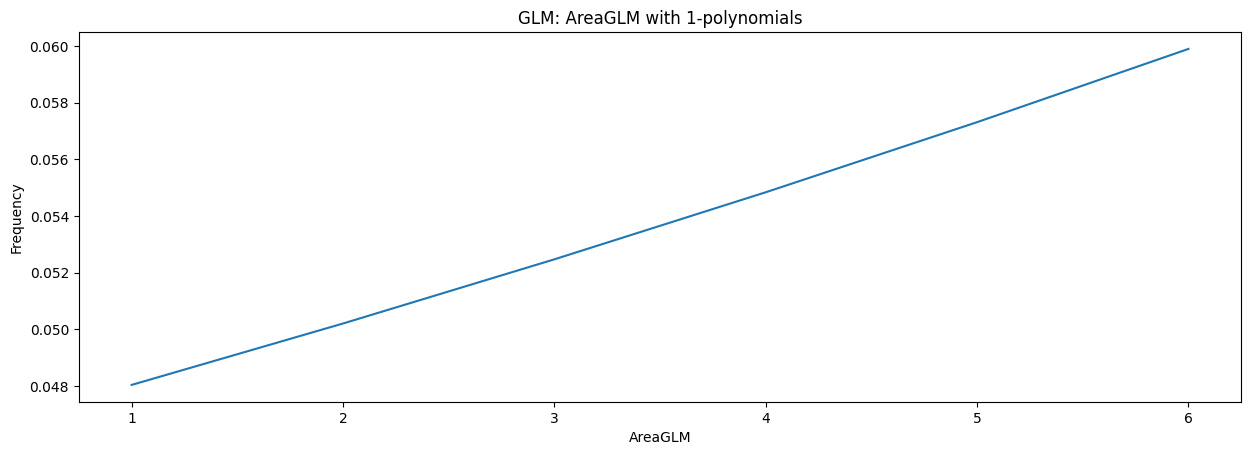

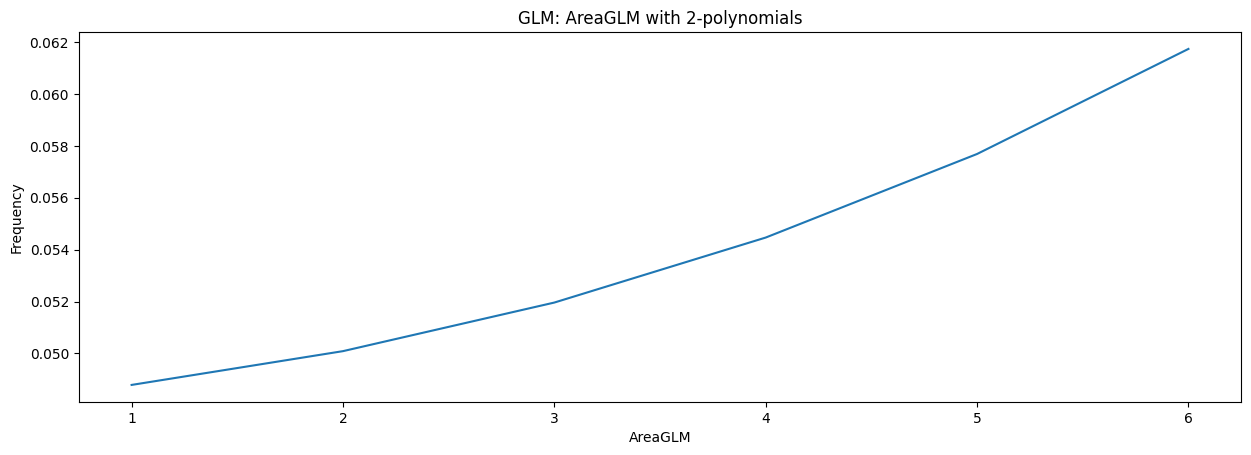

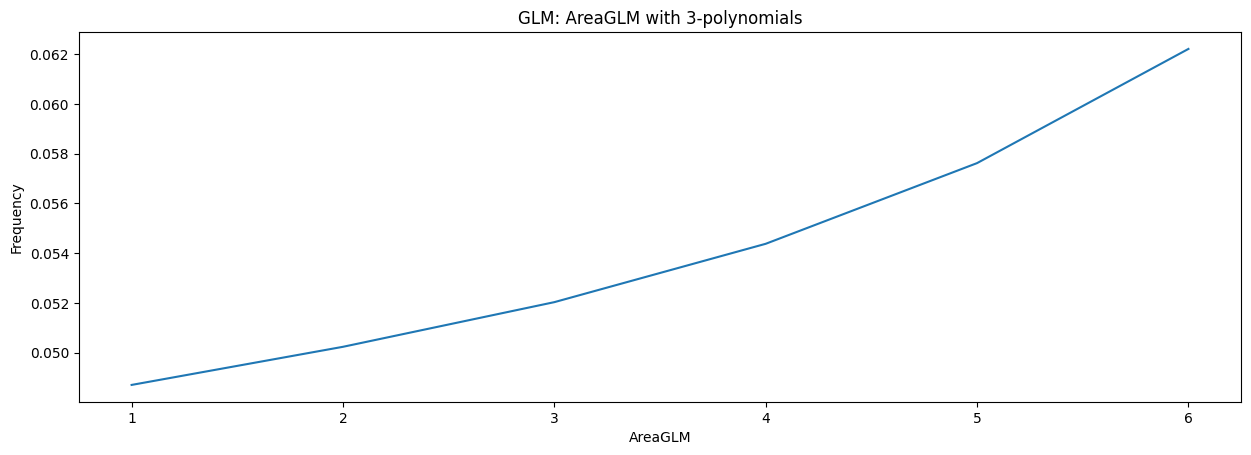

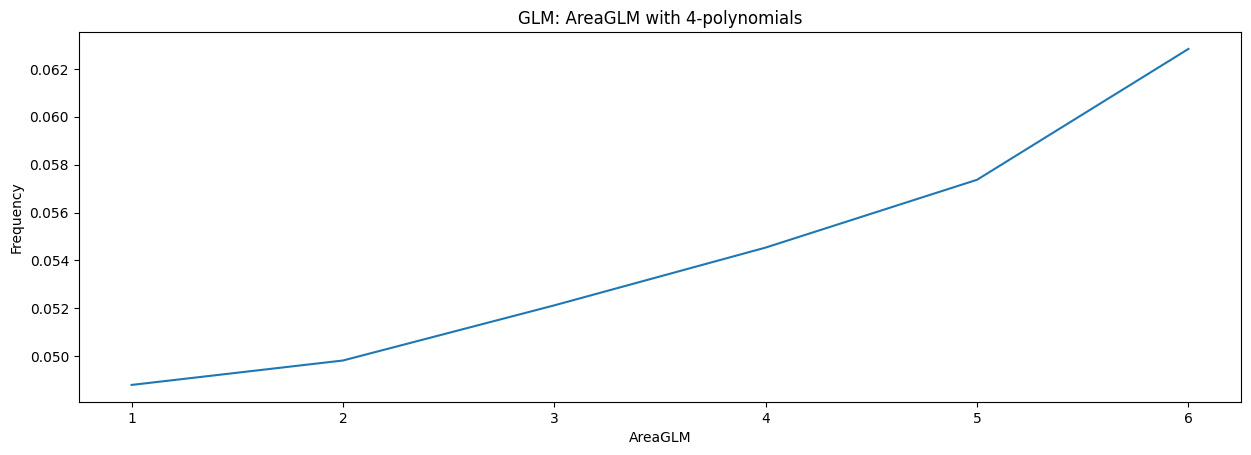

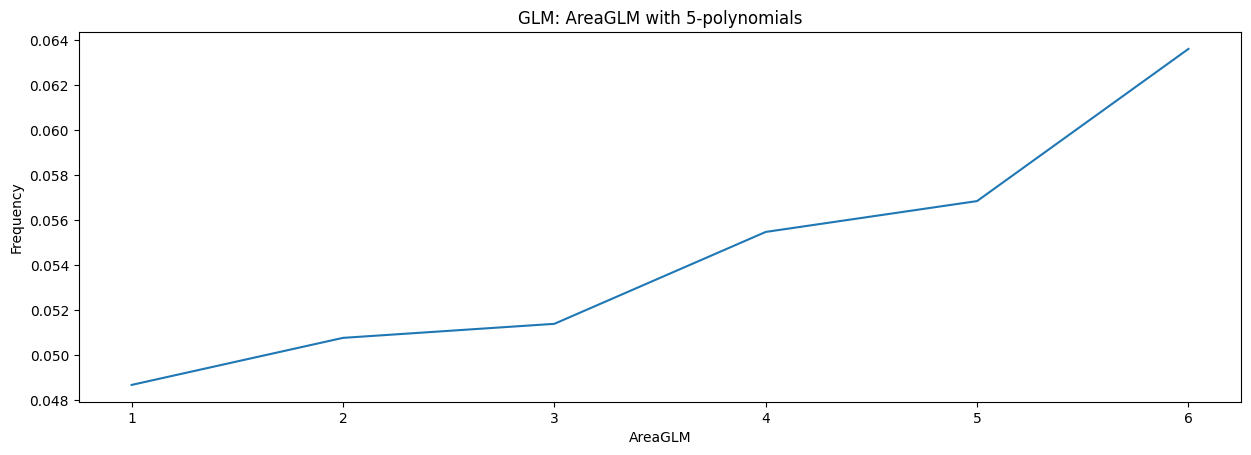

####################################################################################################
Variable: Density

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


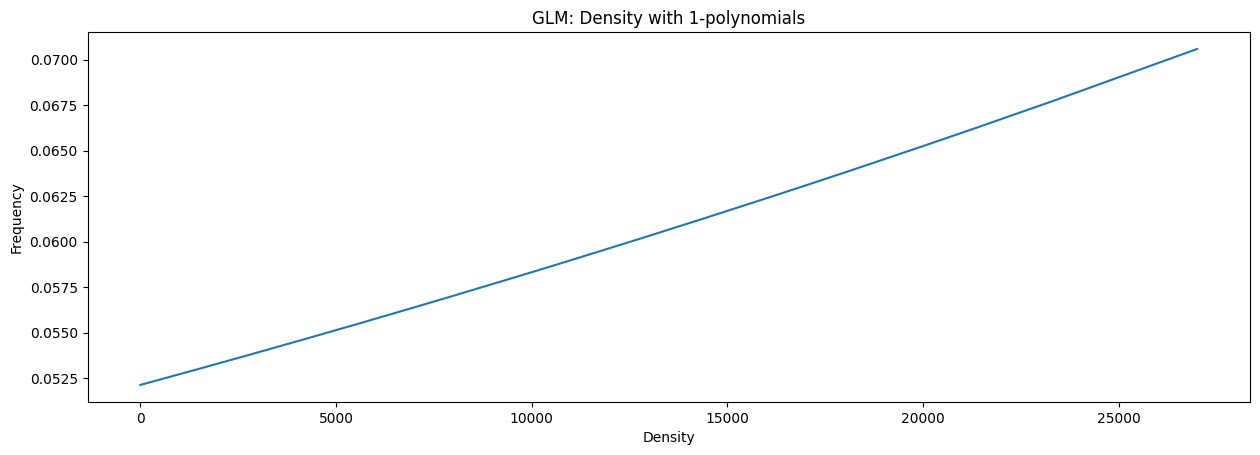

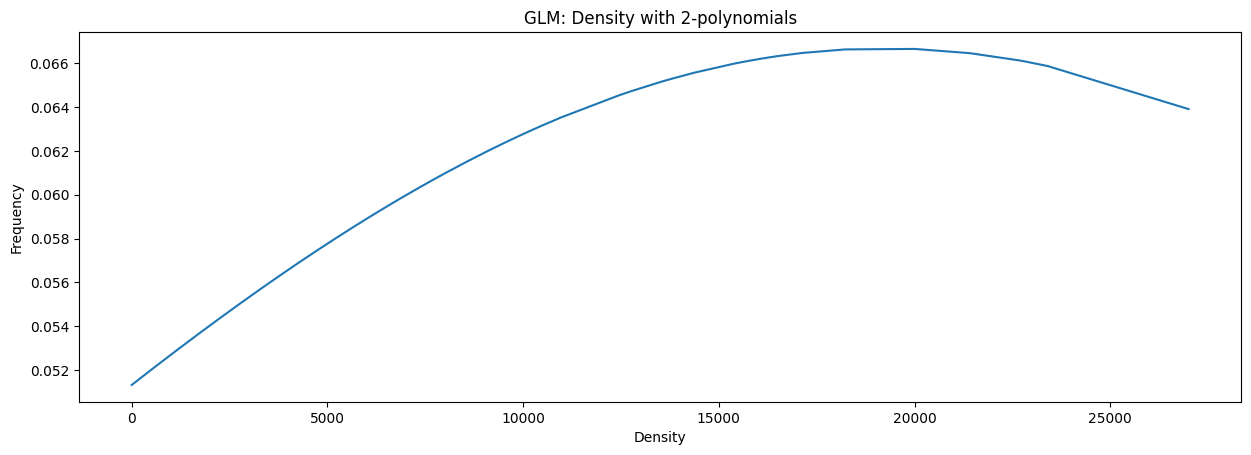

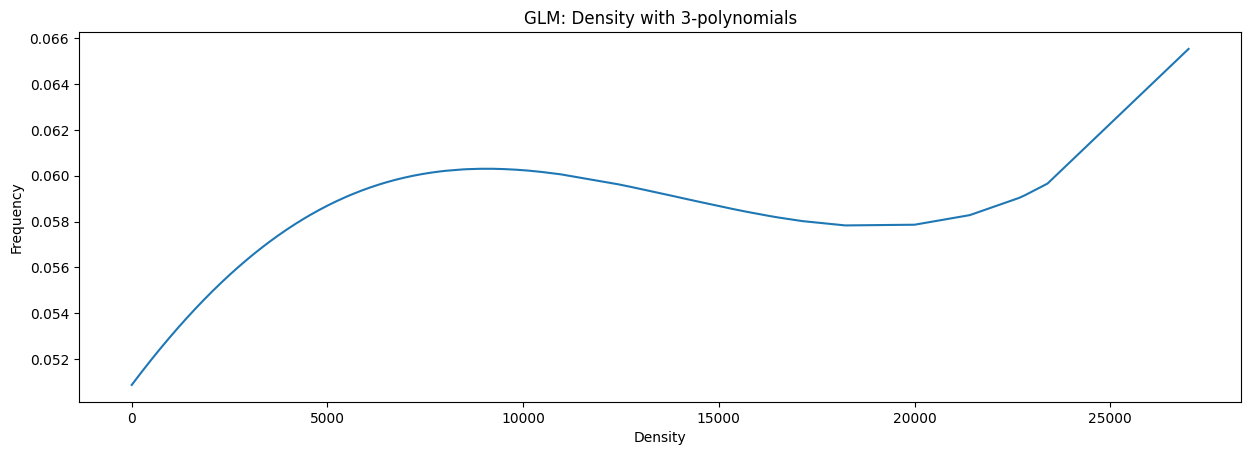

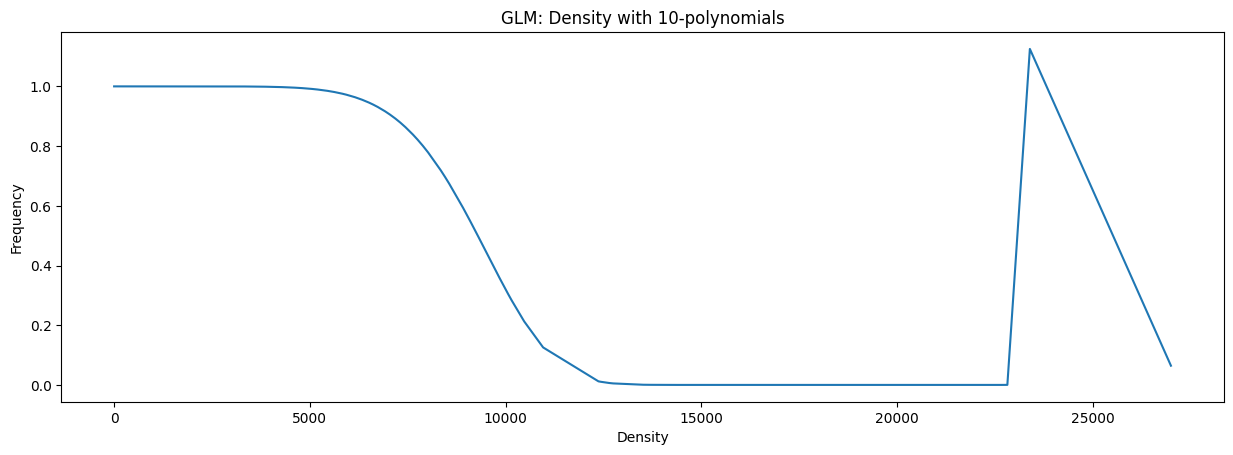

####################################################################################################
Variable: BonusMalus

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


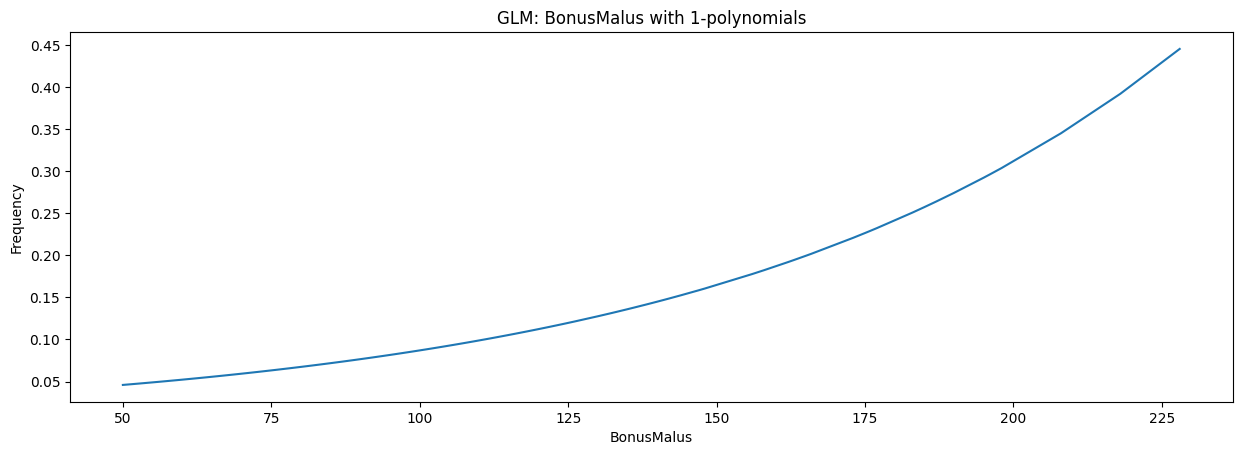

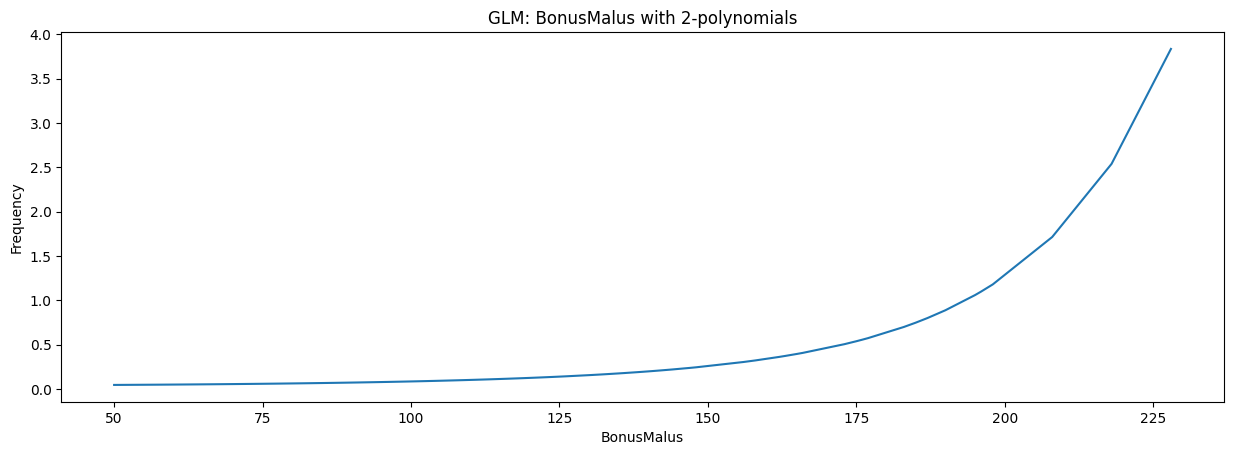

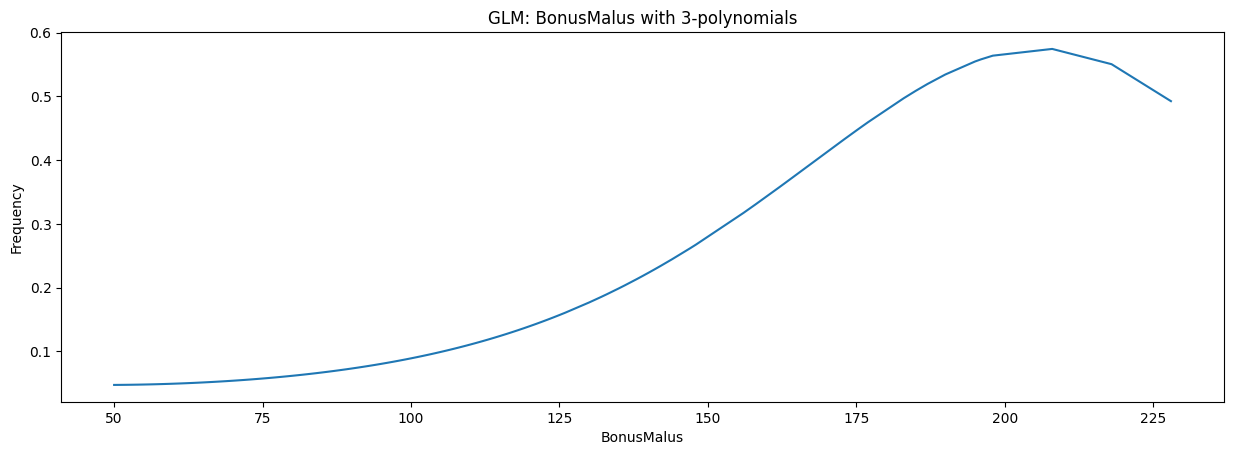

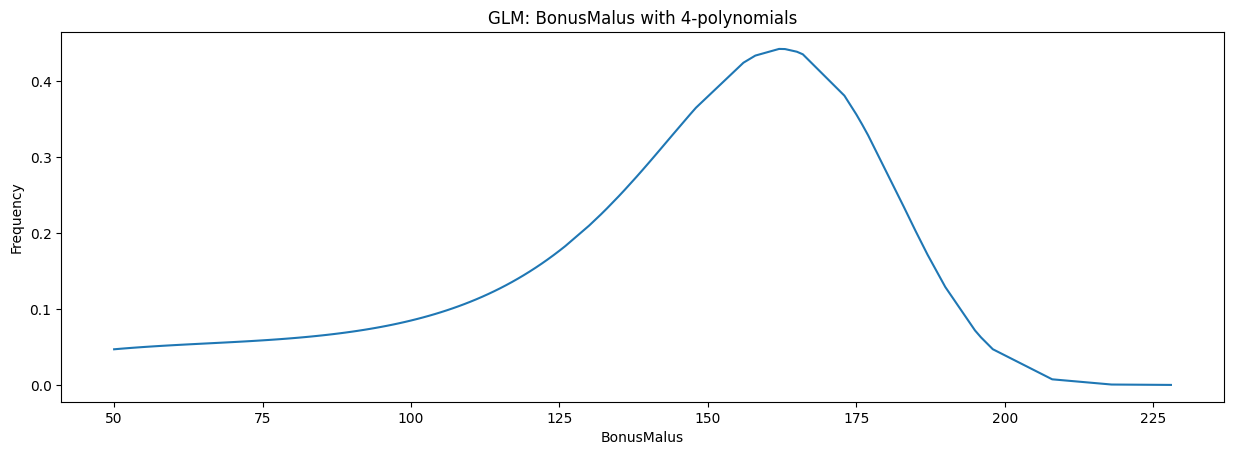

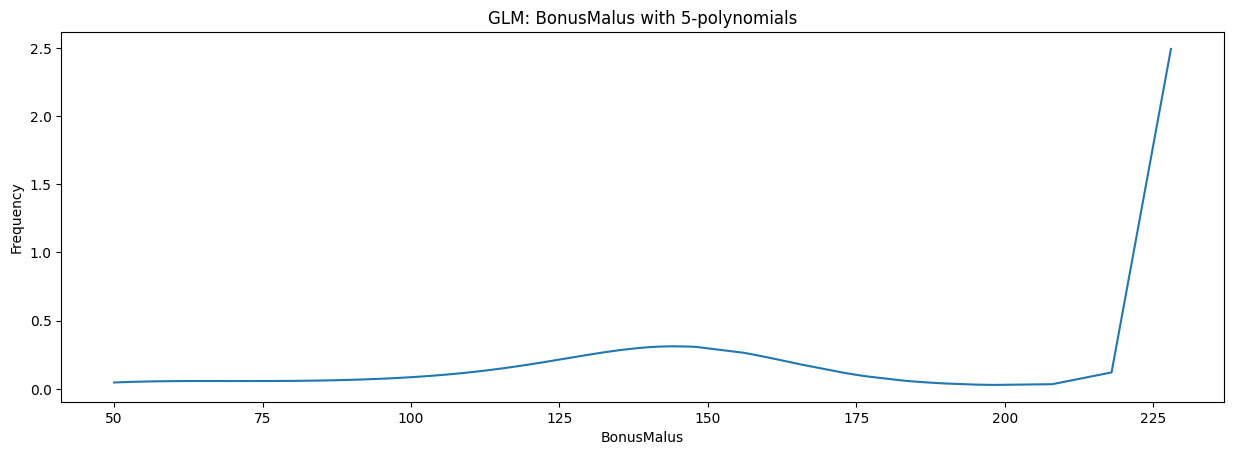

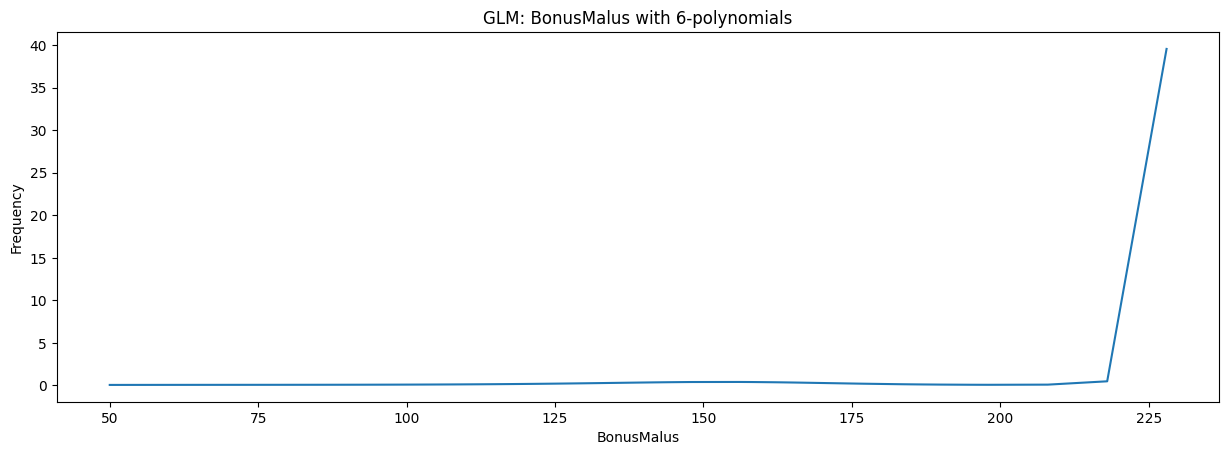

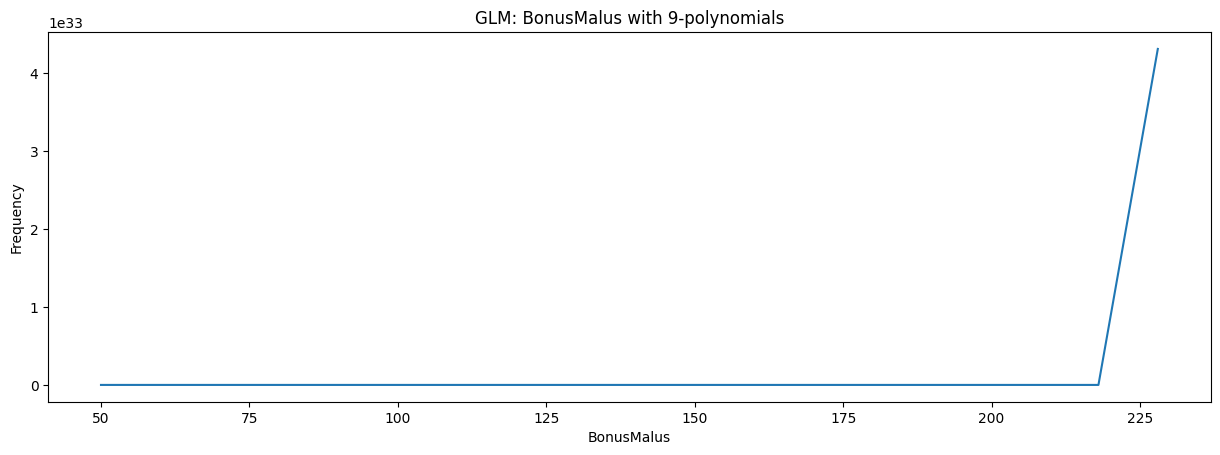

####################################################################################################
Variable: VehPower

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


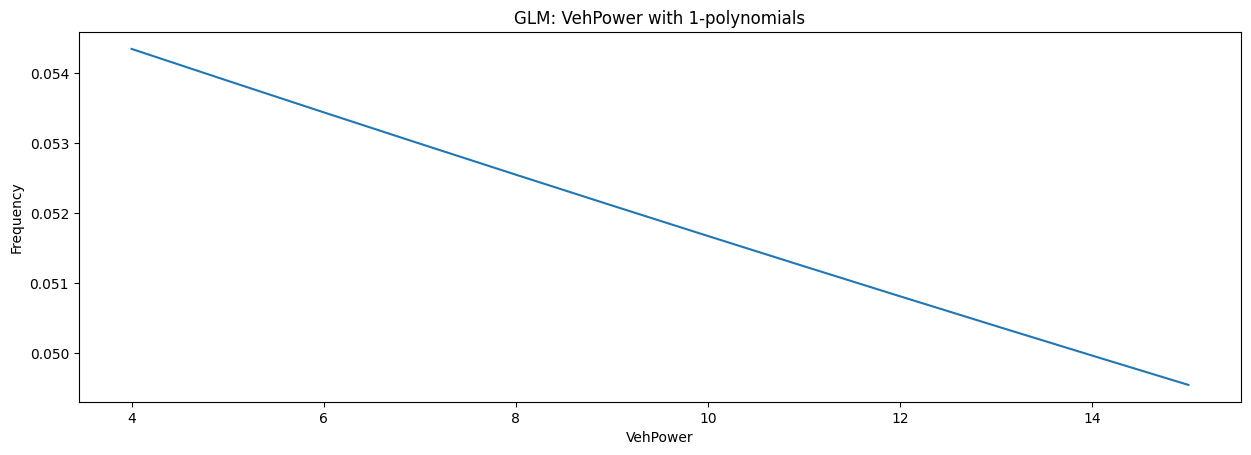

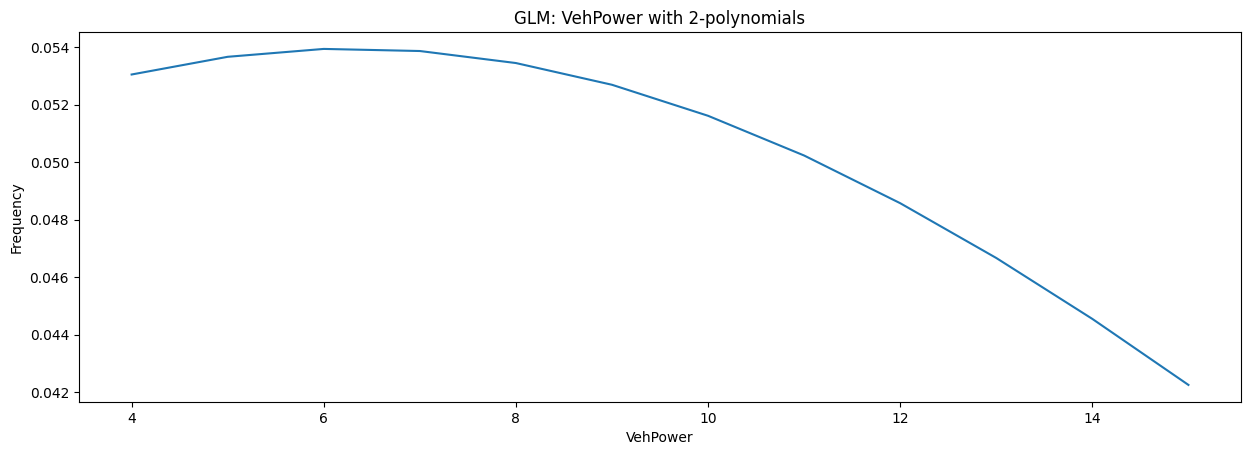

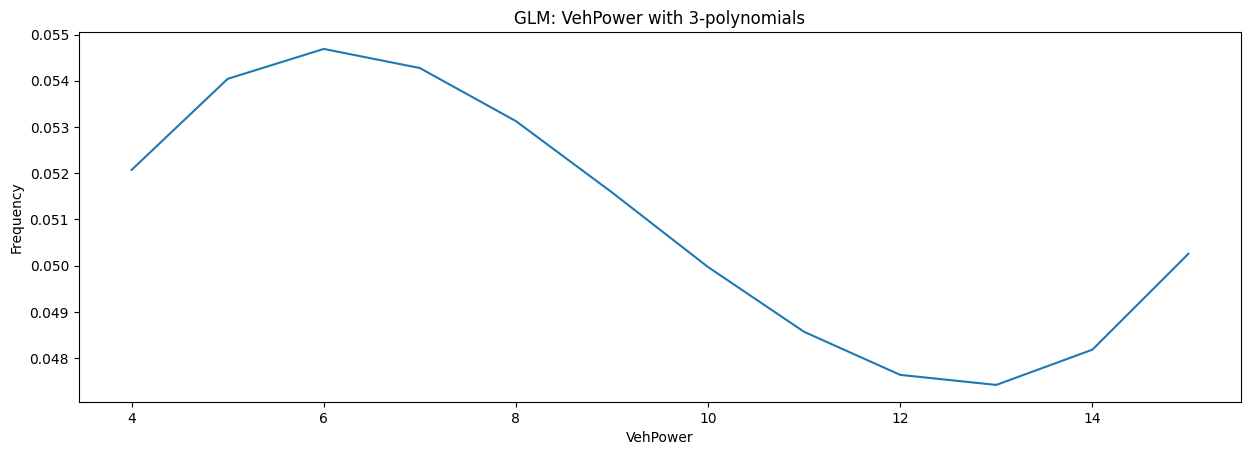

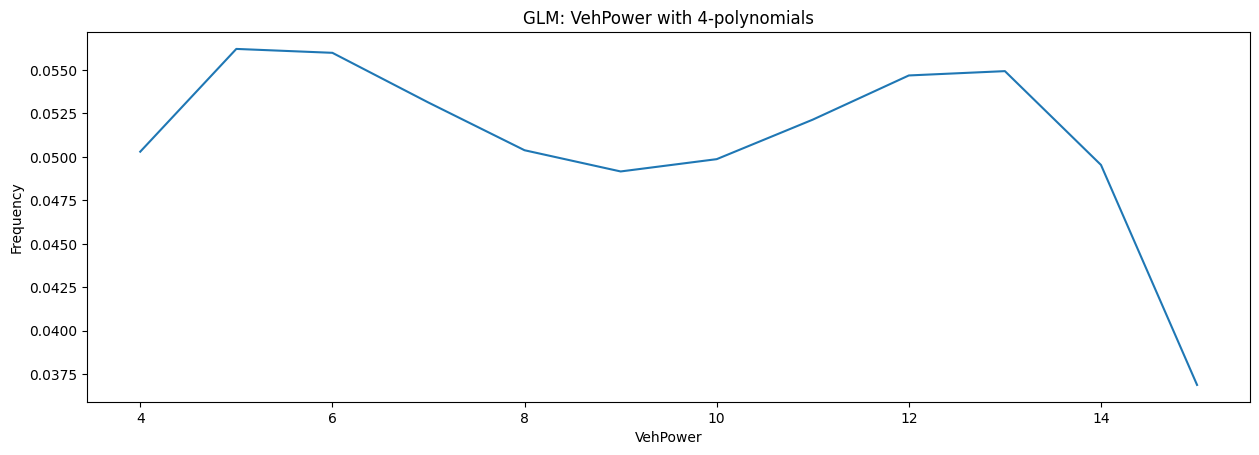

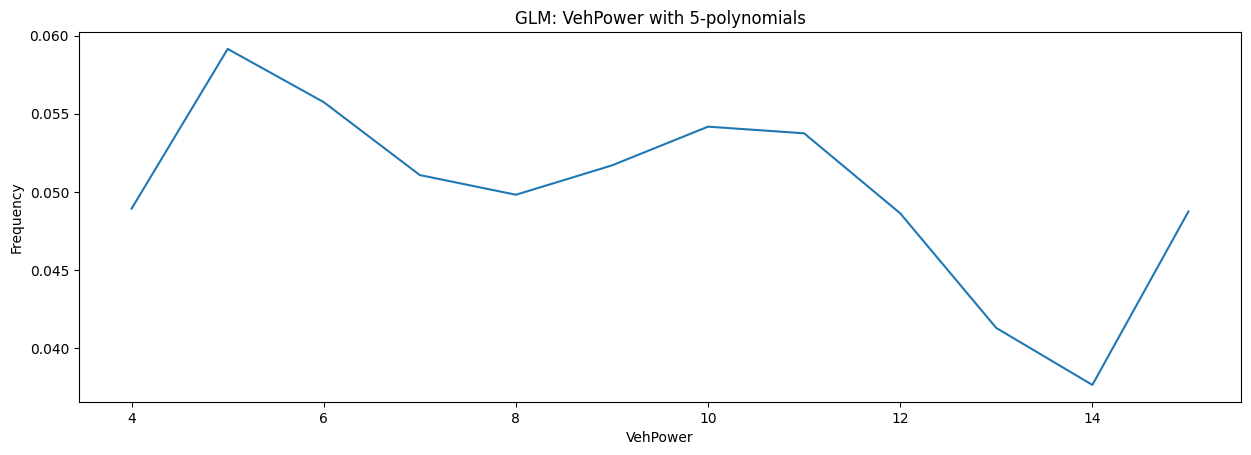

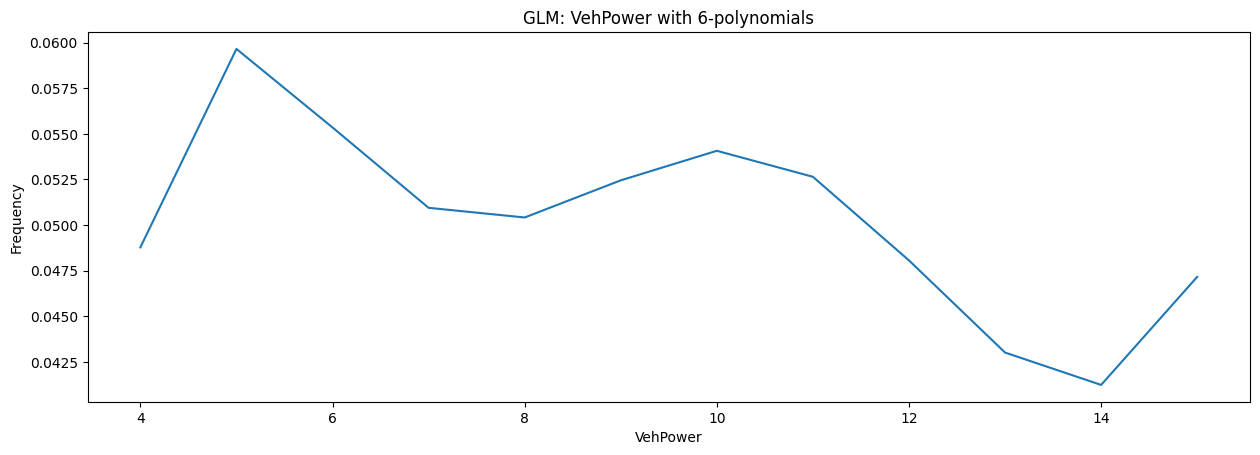

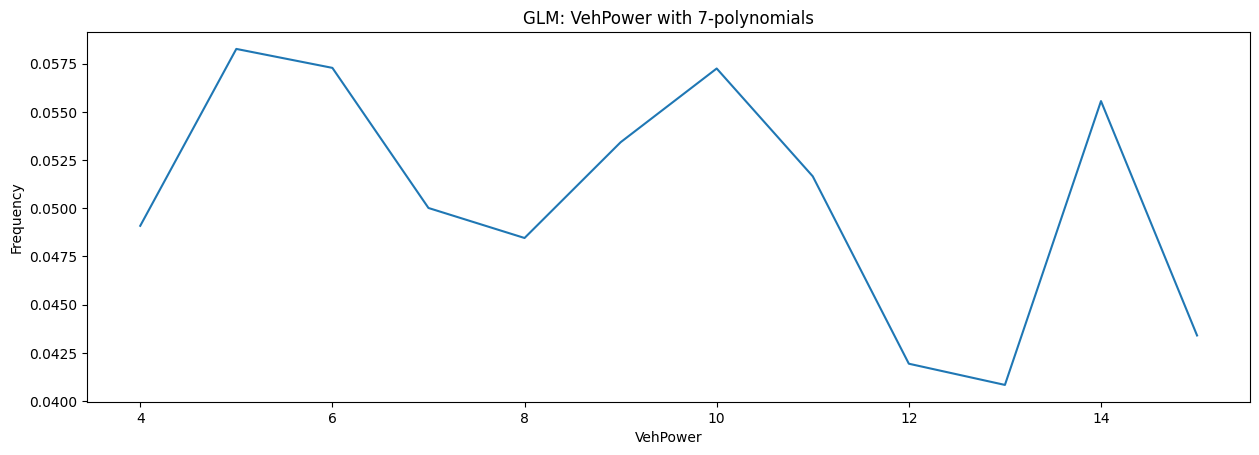

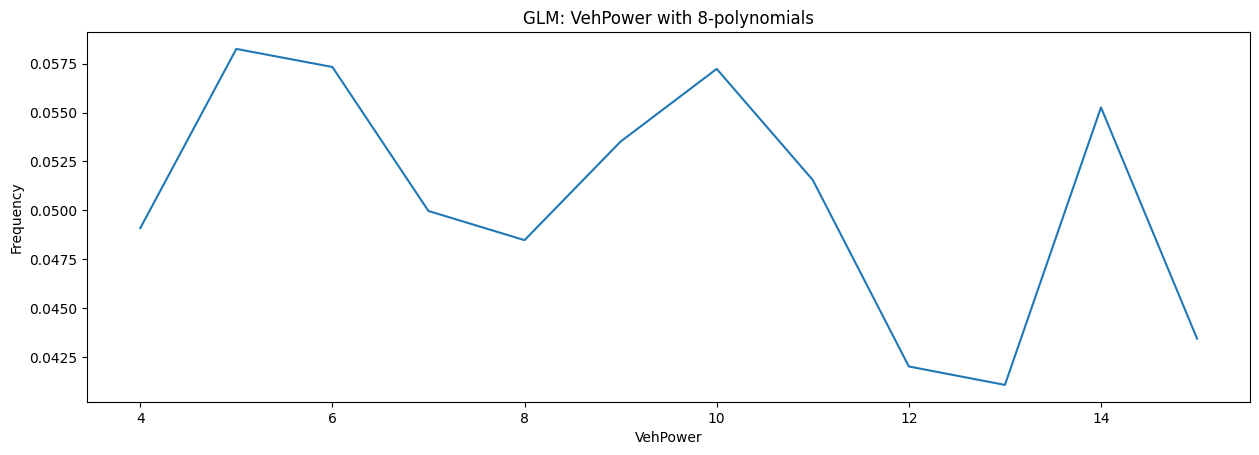

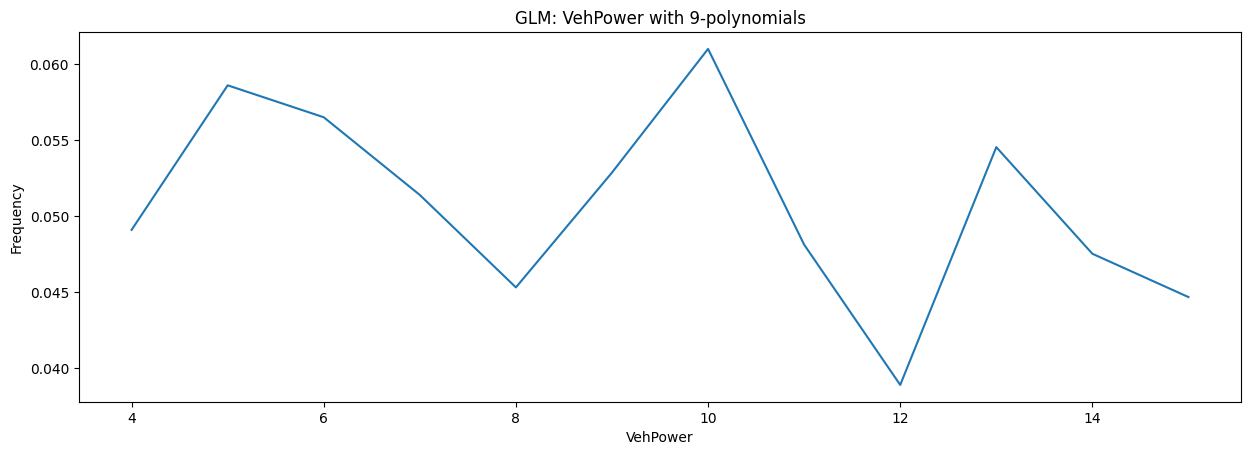

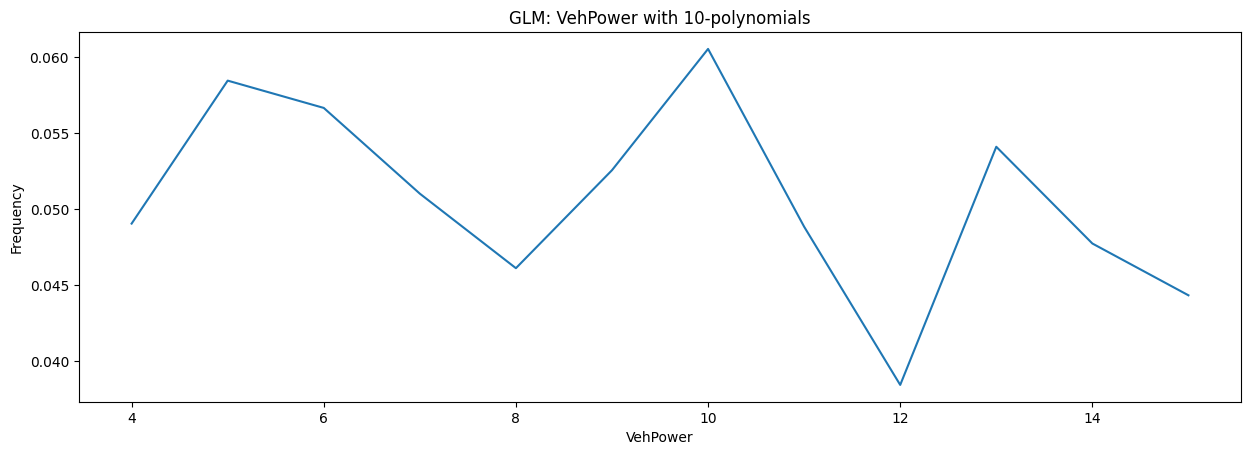

####################################################################################################
Variable: VehAge

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


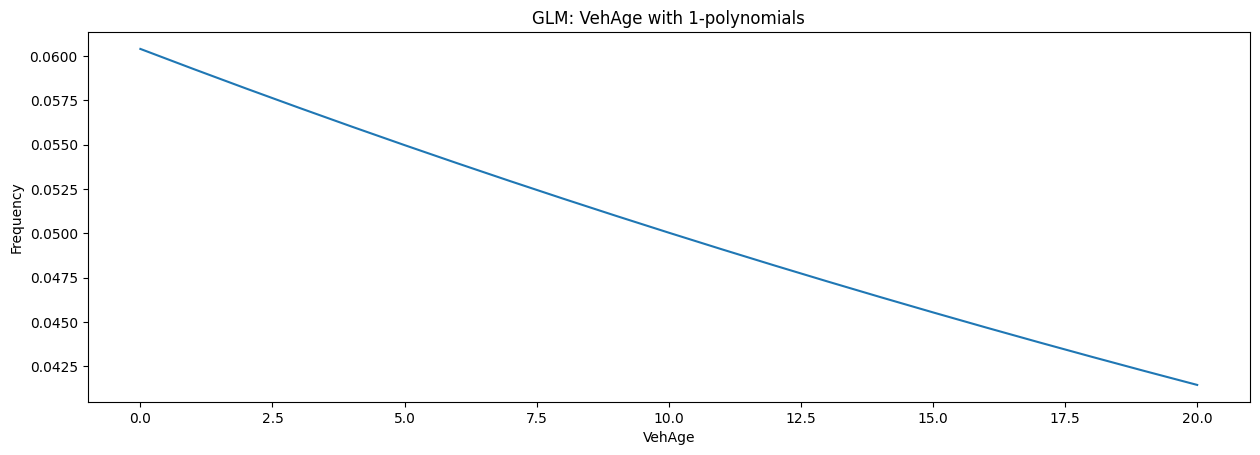

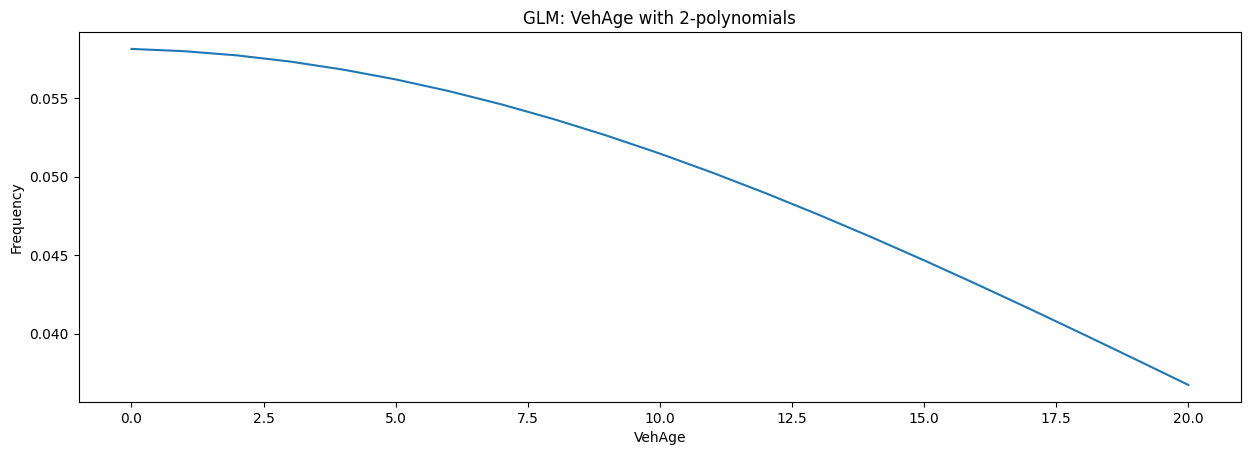

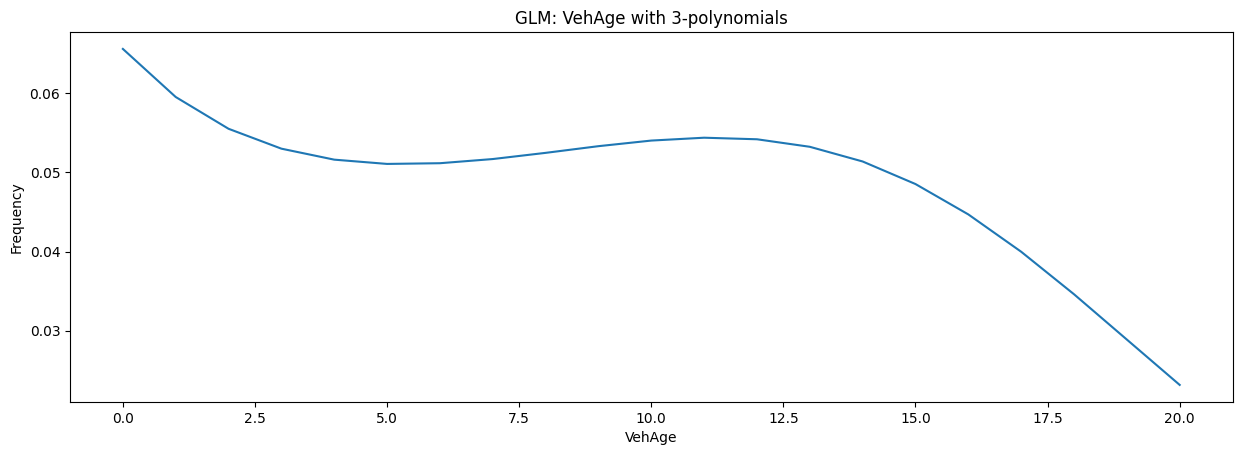

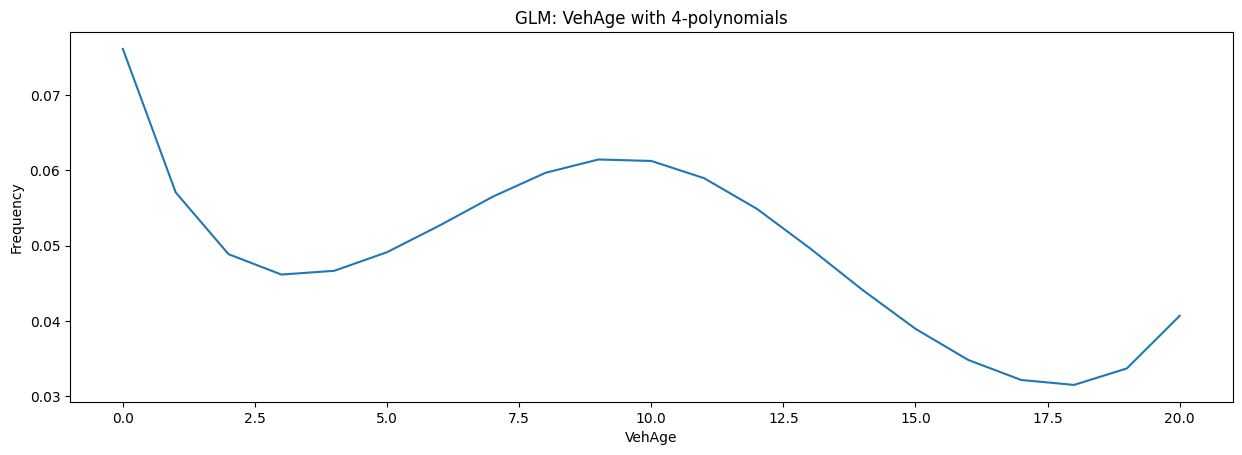

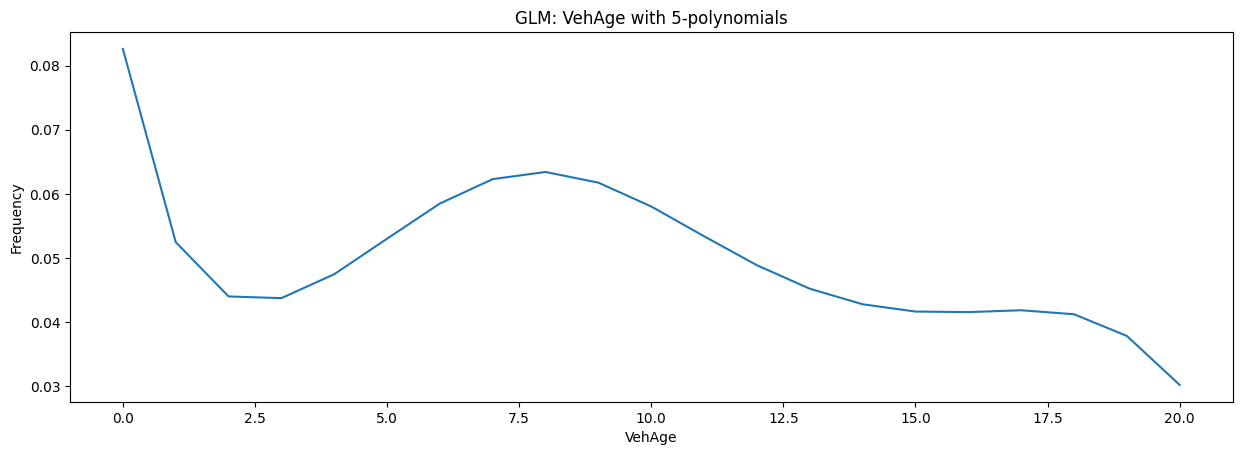

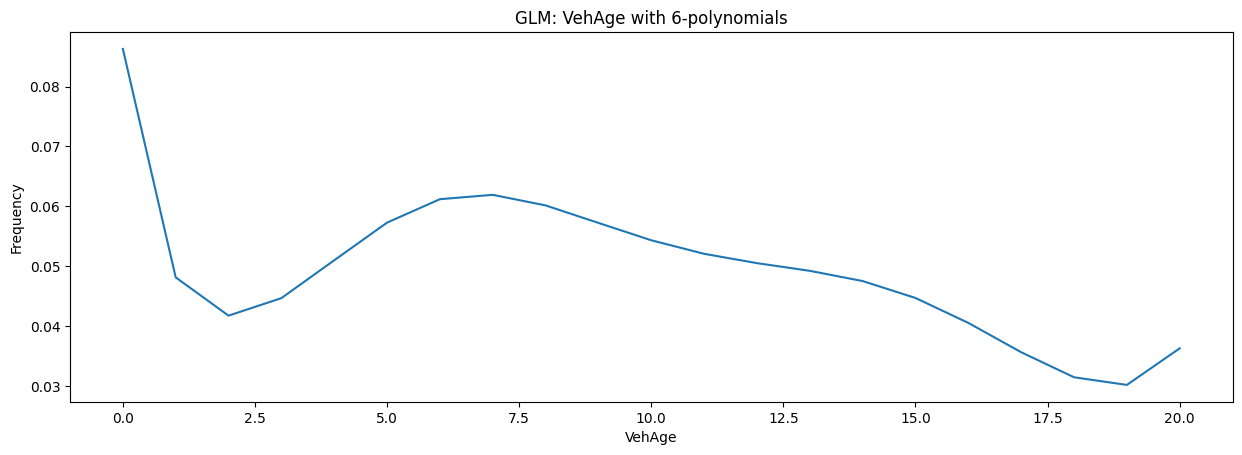

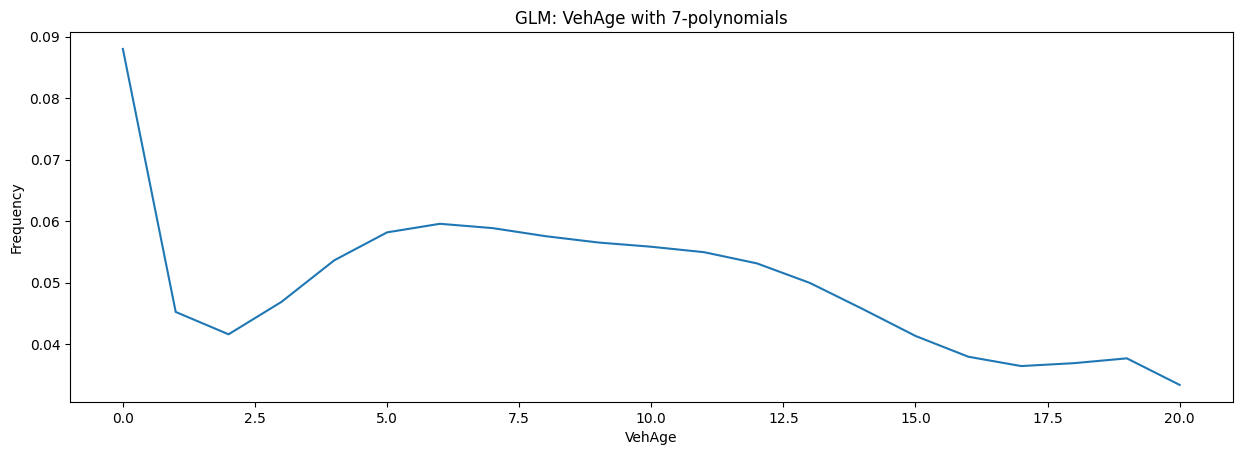

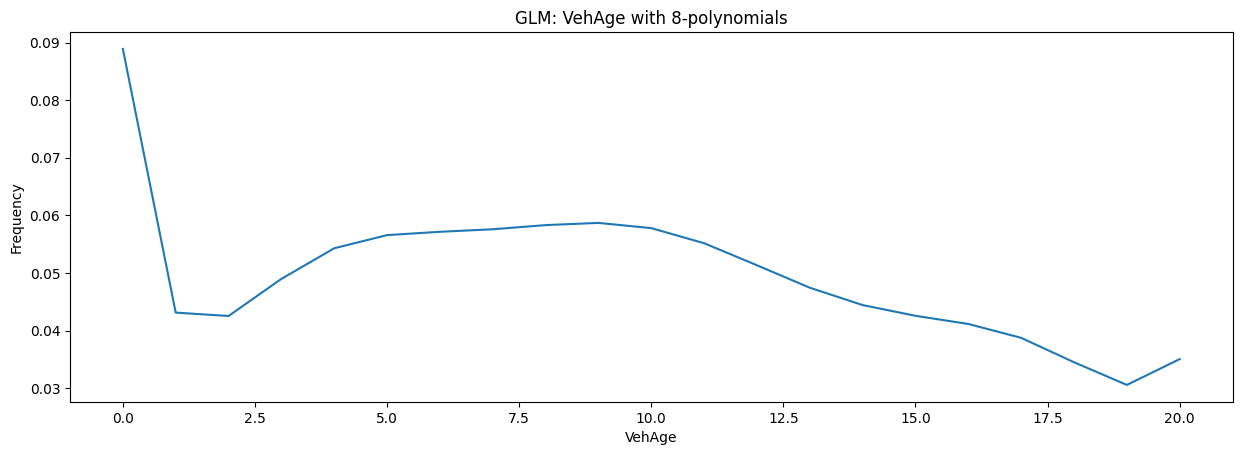

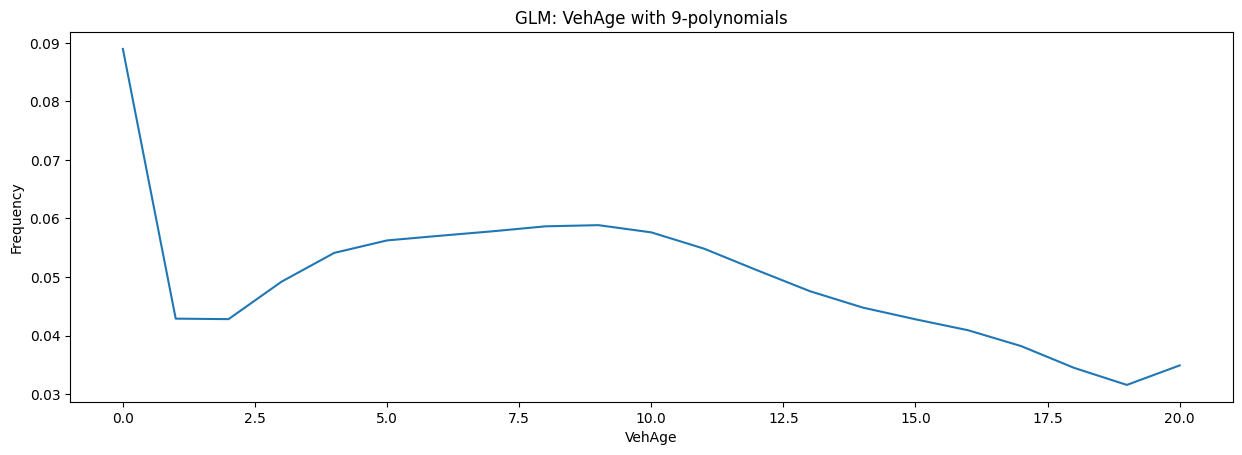

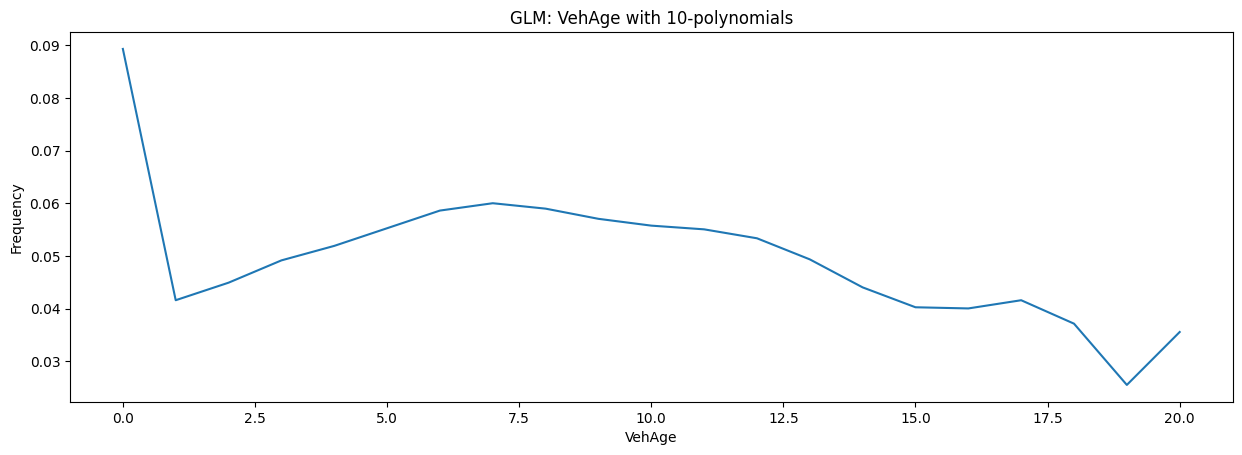

####################################################################################################
Variable: DrivAge

Please choose the closest representation for the relationship between the variable and frequency of the below representations
Once chosen, we will further adjust it on Thursday


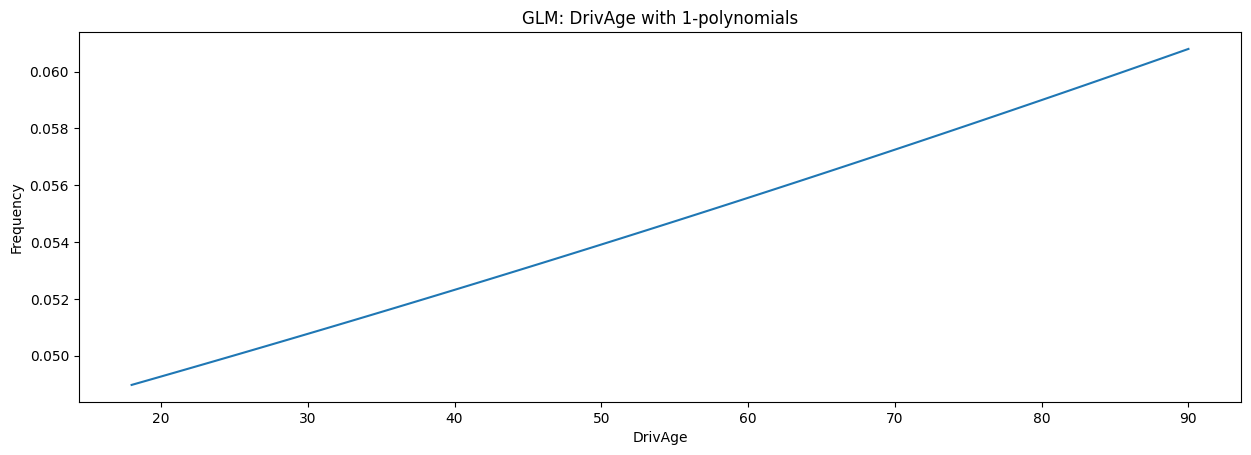

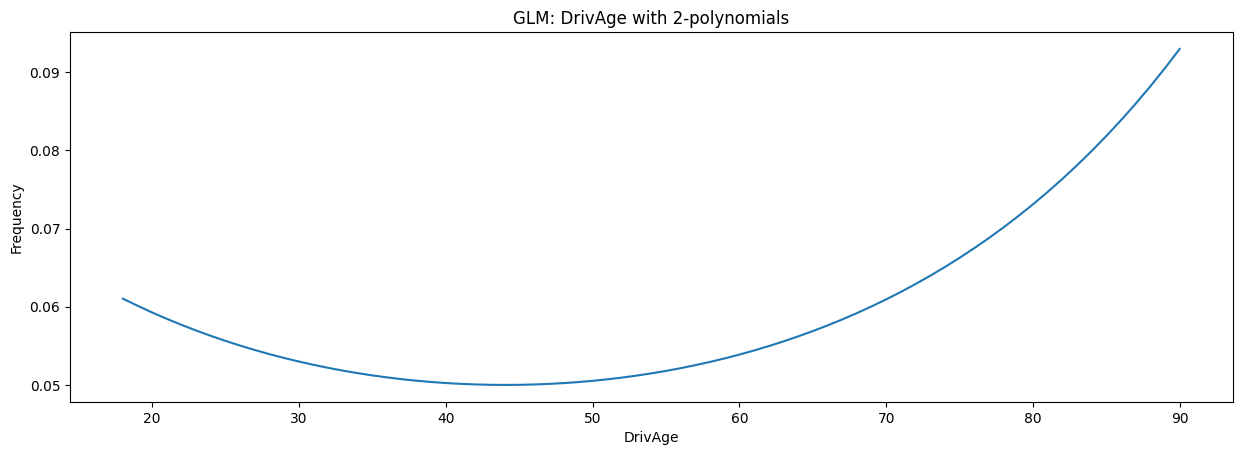

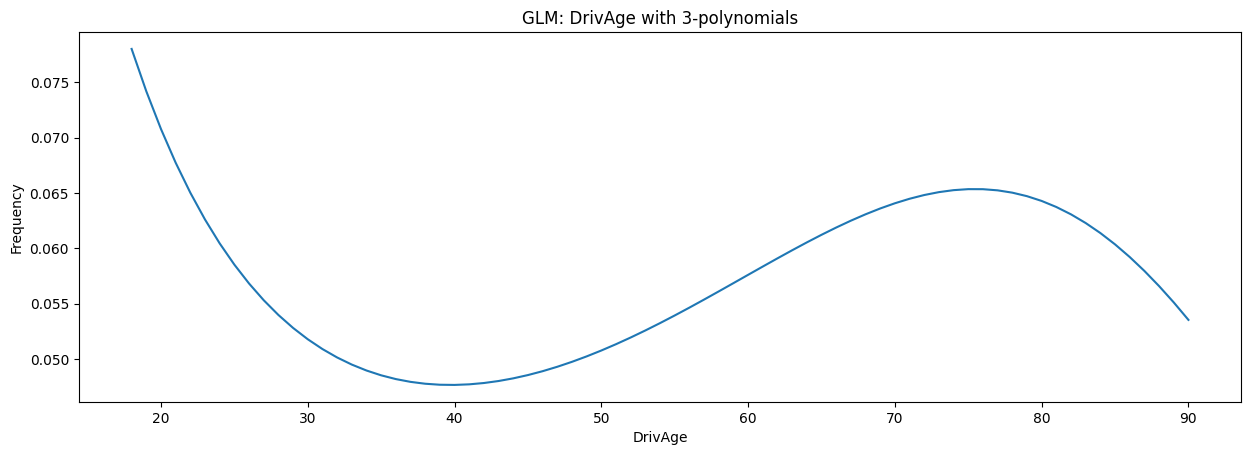

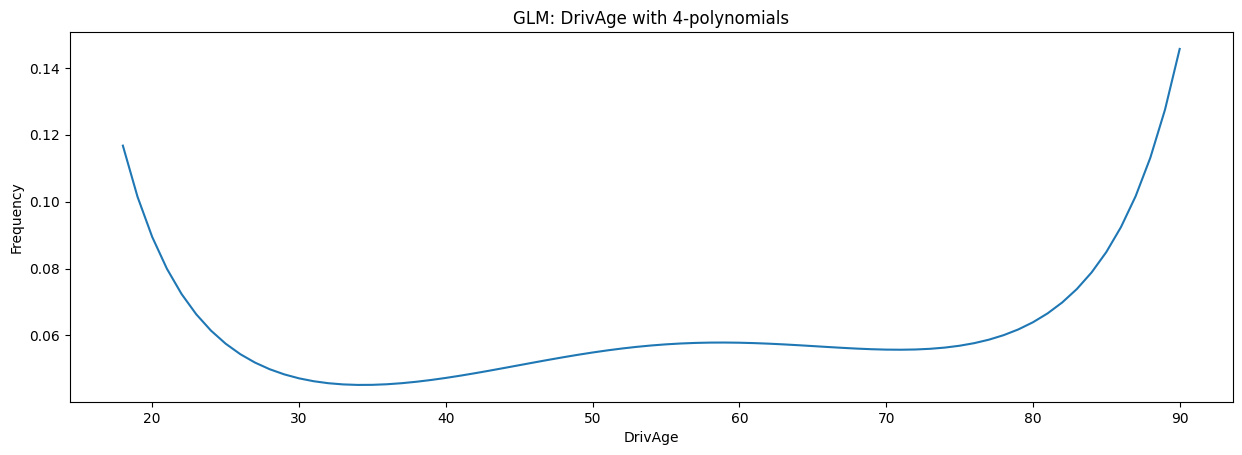

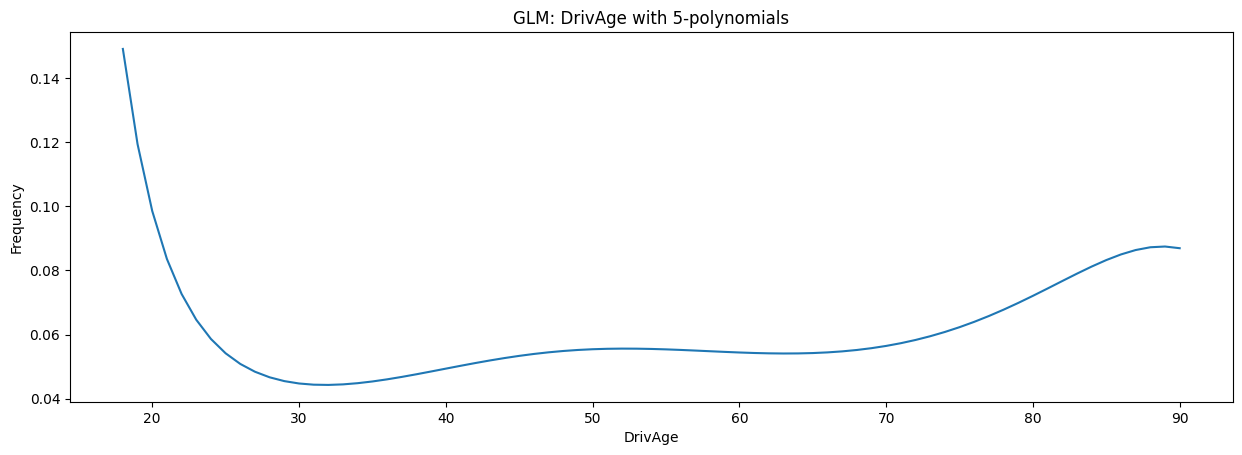

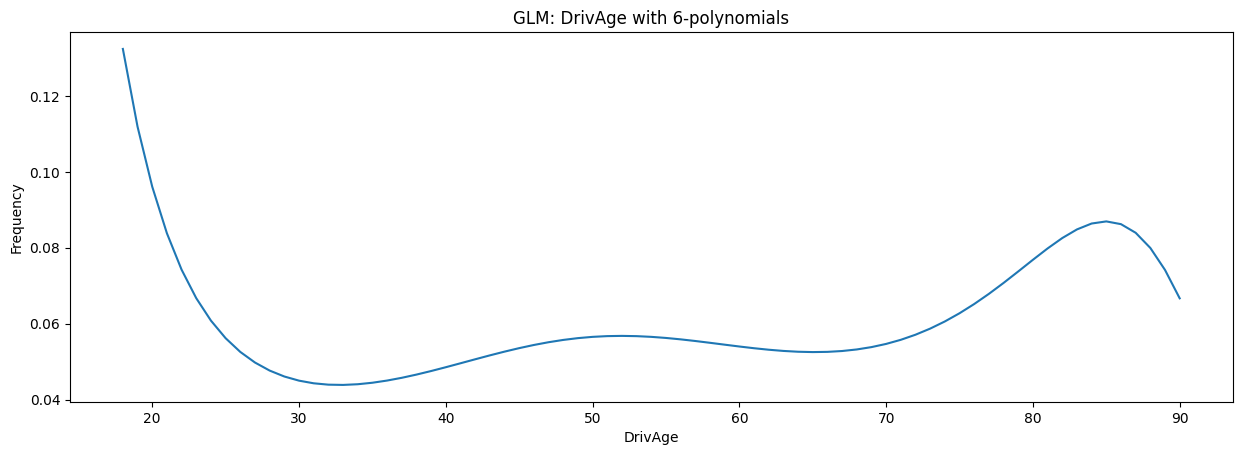

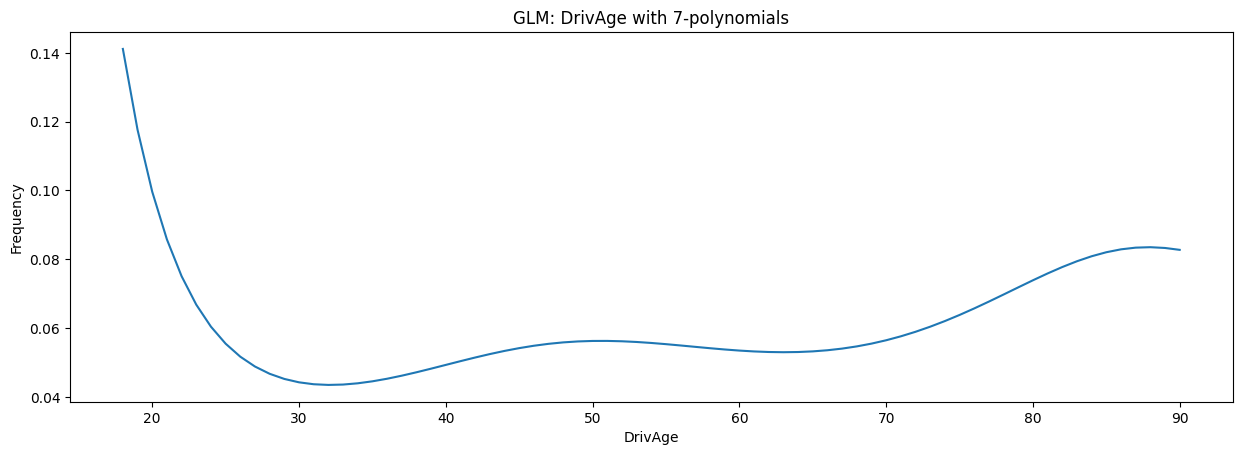

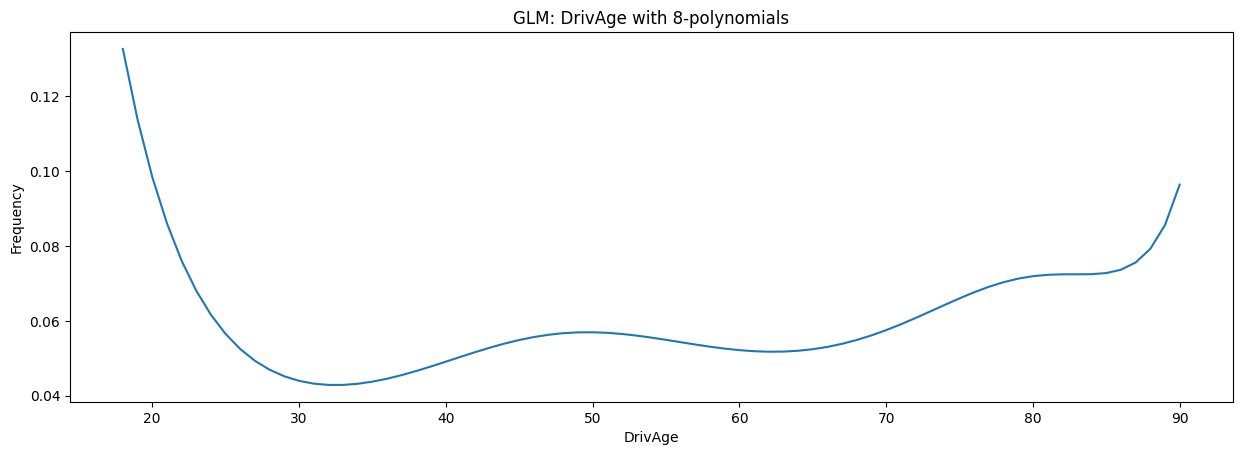

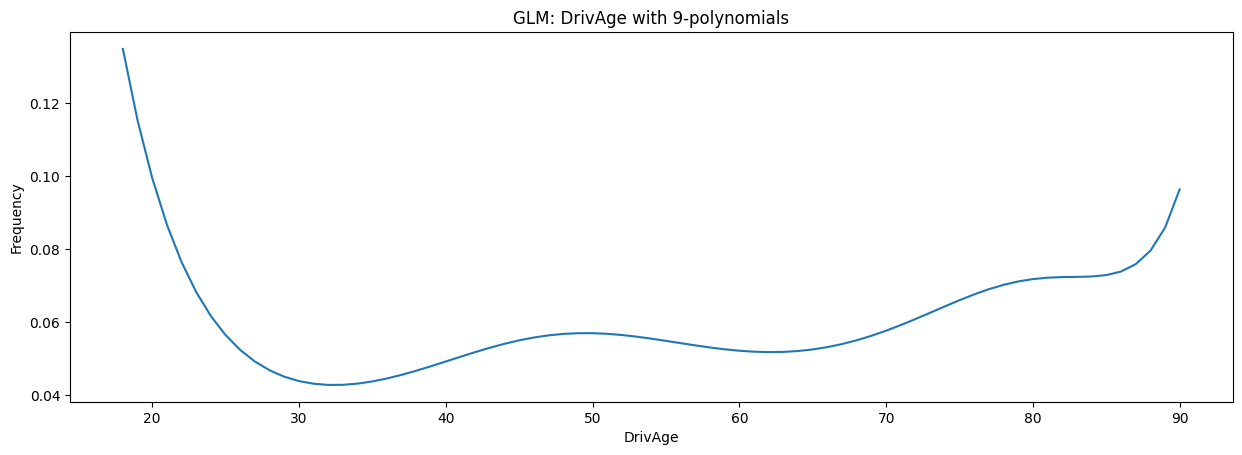

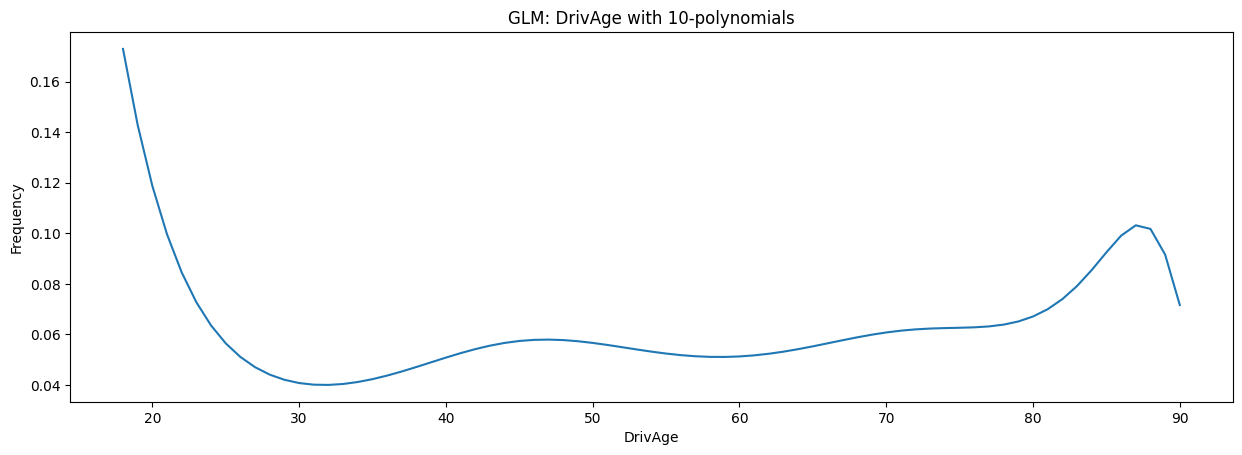

####################################################################################################


In [8]:
conts_expert = ['AreaGLM', 'Density', 'BonusMalus', 'VehPower', 'VehAge', 'DrivAge']

for colname in conts_expert:
    print(f'Variable: {colname}')
    print('')
    print('Please choose the closest representation for the relationship between the variable and frequency of the below representations')
    print('Once chosen, we will further adjust it on Thursday')
    collen = freq_expert2[colname].nunique()
    if collen > 11:
        collen = 11
    for i in range(1, collen):    
        polynomial_features= PolynomialFeatures(degree=i)
        xp = polynomial_features.fit_transform(freq_expert2[[colname]])
        try:
            glm2 = sm.GLM(exog=xp, endog=freq_expert2[['ClaimNb']], family=sm.families.Poisson(link=sm.families.links.log())).fit()
        except ValueError:
            continue
        else:            
            toplot = freq_expert2[[colname]].copy(deep=True)
            toplot['preds'] = glm2.predict(xp)
            toplot = toplot.groupby(colname, as_index=False).mean()
            plt.figure().set_figwidth(15)
            plt.plot(toplot[colname], toplot['preds'])
            plt.title(f"GLM: {colname} with {i}-polynomials")
            plt.xlabel(colname)
            plt
            plt.ylabel("Frequency")
            plt.show()
    print('#' * 100)
        

In [43]:
xgb_model = GradientBoostingRegressor(random_state=1)
xgb_model.fit(freq_expert2[[colname]], freq_expert2['ClaimNb'])
freq_expert2['y_pred'] = xgb_model.predict(freq_expert2[[colname]])

/var/folders/x7/py286zss5fl0wvb7b1w8zvlm0000gn/T/ipykernel_98823/3637203425.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  freq_expert2.groupby(colname, as_index=False).mean().plot(x=colname, y='y_pred')


<AxesSubplot: xlabel='DrivAge'>

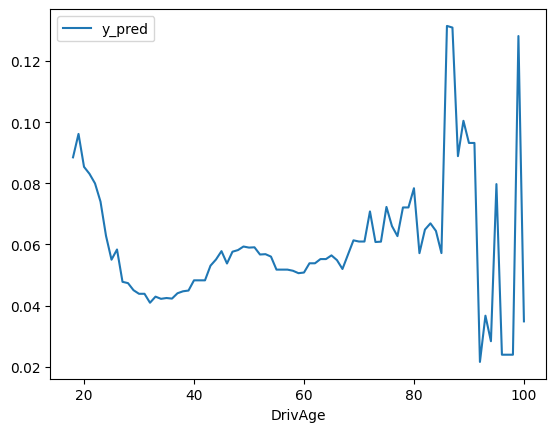

In [44]:
freq_expert2.groupby(colname, as_index=False).mean().plot(x=colname, y='y_pred')


In [ ]:

cols = freq.columns
for colname in cols:
    fig, axs = plt.subplots()
    if colname == 'ClaimNb':
        continue
    df = freq.copy(deep=True)
    nunique = df[colname].nunique()
    if nunique > 50:
        df['decile'] = pd.qcut(df[colname], min(80, nunique), duplicates='drop')
        df.groupby('decile', as_index=False).mean().plot(x=colname, y='ClaimNb', ax=axs)
    else:
        df.groupby(colname, as_index=False).mean().plot(x=colname, y='ClaimNb', ax=axs)
